<a href="https://colab.research.google.com/github/rebork555/Analisis-de-datos-de-marketing/blob/main/Programa_aprendizaje_autom%C3%A1tico_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tres programas de aprendizaje automático para predecir el aumento o disminución del dinero gastado en vino y para predecir el aumento o disminución del dinero gastado en todos los productos, del archivo excel del curso de análisis de datos a través de Microsoft Power BI:

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data

He hecho dos programas de aprendizaje automático:

**1. Primer modelo**: el primer modelo aplica una regresión lineal basada en Ridge, Lasso, ElasticNet porque es más fácil de interpretar, de ejecutar en un servidor y más fácil de realizar el mantenimiento.

**2. Segundo modelo**: el segundo modelo aplica: RandomForest, GradientBoosting y XGBoost. Es un modelo que tiene más capacidad para predecir, pero es más difícil de interpretar, más difícil de ejecutar en un servidor y más difícil de realizar el mantenimiento.

## **1. Modelo de regresión lineal que aplica Ridge, Lasso, y ElasticNet  (más facil de interpretar, y de ejecutar en un servidor, y mas facil de realizar el mantenimiento)**

Ridge - R^2 Score medio en validación cruzada: 0.6791915567381495
Lasso - R^2 Score medio en validación cruzada: 0.6809899155547605
ElasticNet - R^2 Score medio en validación cruzada: 0.671736606709035


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.715e+06, tolerance: 1.856e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.379e+06, tolerance: 1.812e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.894e+06, tolerance: 1.803e

Mejor modelo: ElasticNet(alpha=0.1, l1_ratio=0.1)
Mean Squared Error: 36782.553445637386
R^2 Score: 0.6861890610797676


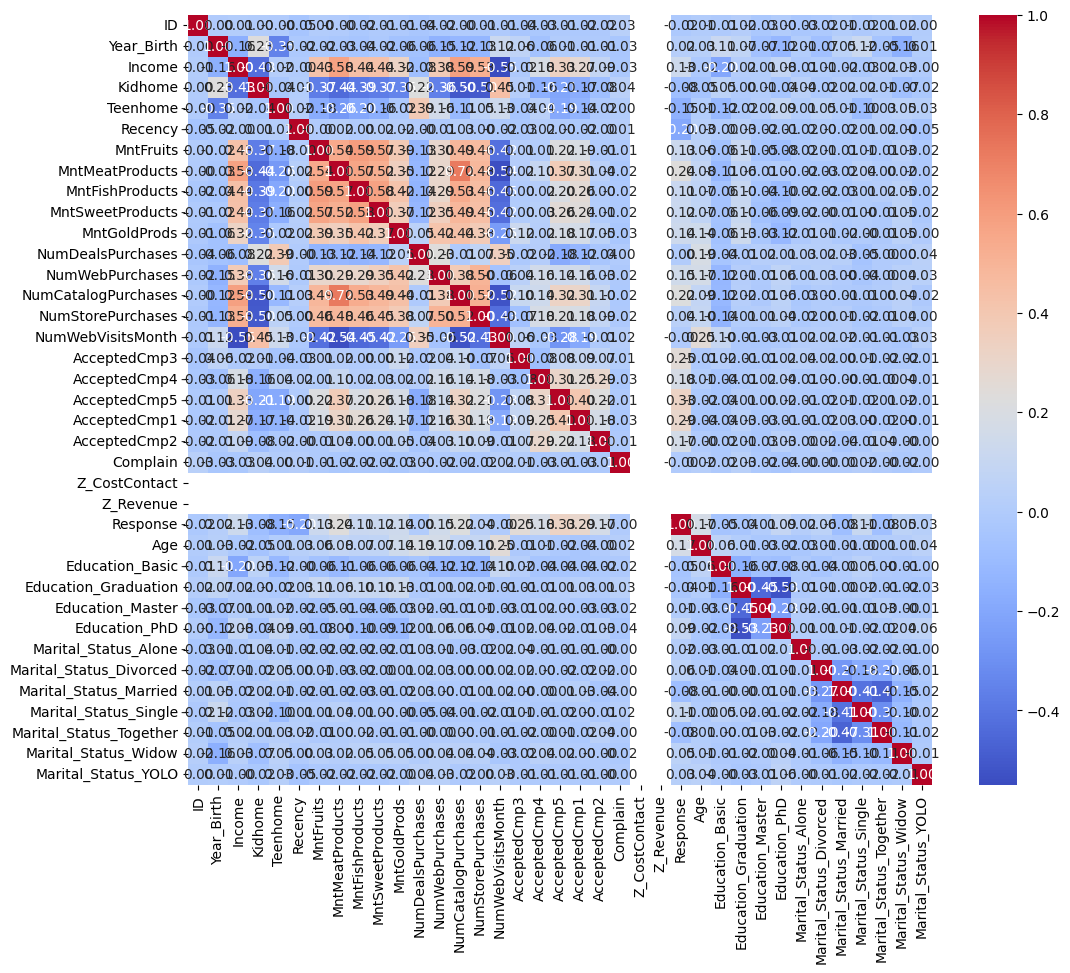

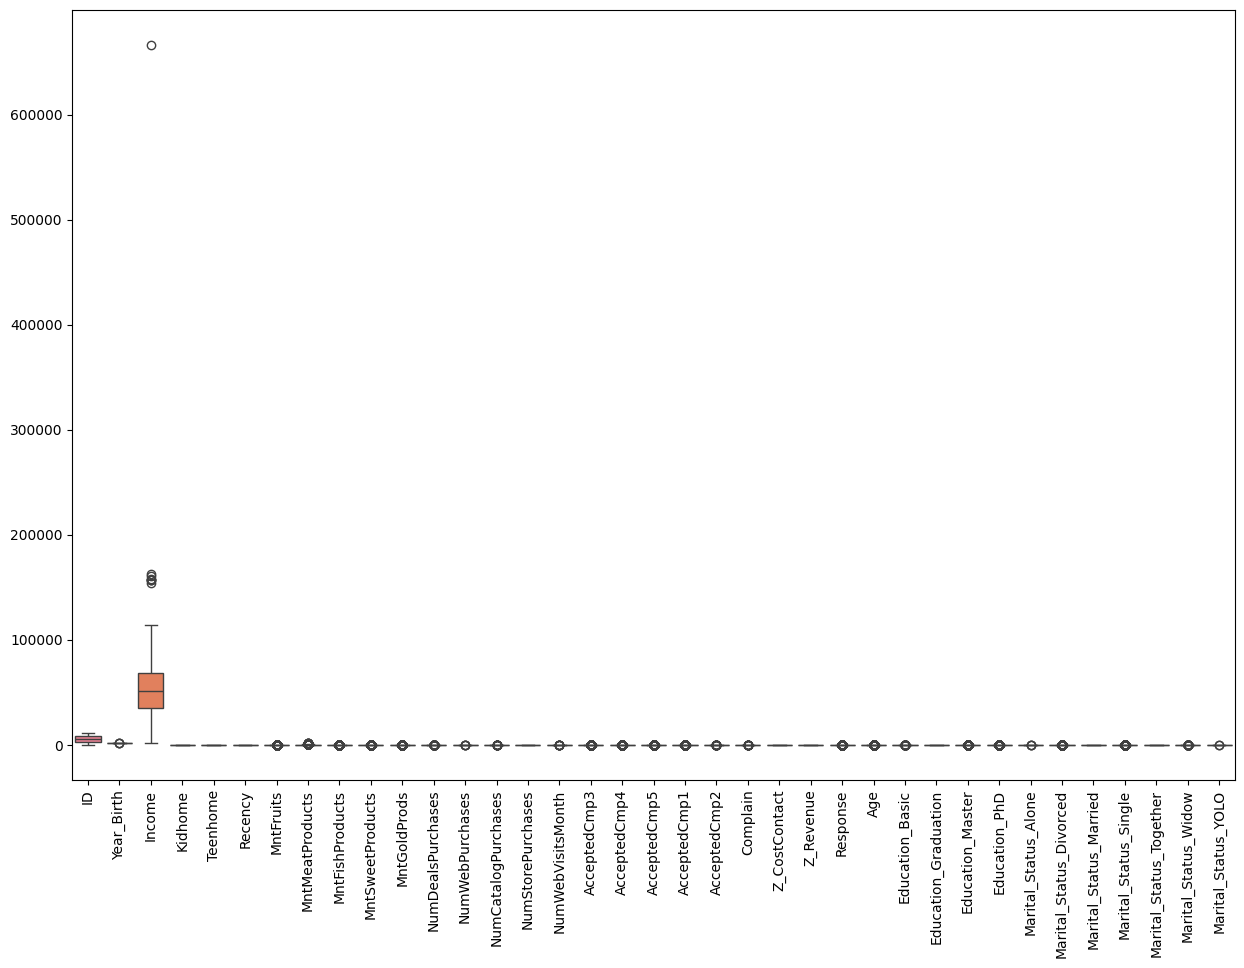

RandomForest - Mean Squared Error: 21029.90539174107
RandomForest - R^2 Score: 0.8205830281429619
GradientBoosting - Mean Squared Error: 23000.690686957005
GradientBoosting - R^2 Score: 0.8037692420958366
XGBoost - Mean Squared Error: 20981.36409973749
XGBoost - R^2 Score: 0.8209971589466474


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel (ajustar la ruta según tu caso)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Rellenar valores nulos en 'Income' con la media, si la columna existe
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].mean())
else:
    print("La columna 'Income' no está presente en el DataFrame.")

# Convertir variables categóricas a variables dummy si 'Education' y 'Marital_Status' están presentes
if 'Education' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
else:
    print("Las columnas 'Education' y/o 'Marital_Status' no están presentes en el DataFrame.")

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='r2')
    print(f"{nombre} - R^2 Score medio en validación cruzada: {np.mean(scores)}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Análisis de multicolinealidad
corr_matrix = df[X_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Identificar y manejar valores atípicos (outliers)
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[X_columns], ax=ax)
plt.xticks(rotation=90)
plt.show()

# Probar modelos de ensamble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

ensamble_modelos = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

for nombre, modelo in ensamble_modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre} - Mean Squared Error: {mse}")
    print(f"{nombre} - R^2 Score: {r2}")


**2. Interpretación de los resultados del modelo de regresión lineal**:

Los resultados que has obtenido de los modelos de regresión lineal regularizada y de los modelos de ensamble son los siguientes:
Modelos de Regresión Lineal Regularizada:

    Ridge: R² Score medio en validación cruzada: 0.6791915567381495
    Lasso: R² Score medio en validación cruzada: 0.6809899155547605
    ElasticNet: R² Score medio en validación cruzada: 0.671736606709035

Estos valores de R² (coeficiente de determinación) indican cuánta variabilidad de la variable objetivo (en este caso, 'MntWines') está explicada por las características seleccionadas por cada modelo. Un valor de 1.0 sería un ajuste perfecto, mientras que un valor cercano a 0 indica que el modelo no puede explicar la variabilidad observada.
Mejor Modelo de Regresión Lineal Regularizada:

El mejor modelo obtenido a través de la búsqueda de hiperparámetros para ElasticNet es:

    ElasticNet:
        Mejor modelo: ElasticNet(alpha=0.1, l1_ratio=0.1)
        Mean Squared Error: 36782.553445637386
        R² Score en conjunto de prueba: 0.6861890610797676

Modelos de Ensamble:

    RandomForest:
        Mean Squared Error: 19963.343258035715
        R² Score: 0.8296824199263385

    GradientBoosting:
        Mean Squared Error: 22955.573143332
        R² Score: 0.8041541631358525

    XGBoost:
        Mean Squared Error: 20981.36409973749
        R² Score: 0.8209971589466474

Interpretación:

    Regresión Lineal Regularizada: Los modelos Ridge, Lasso y ElasticNet tienen rendimientos similares en términos de R² en validación cruzada. Estos modelos están diseñados para lidiar con multicolinealidad y evitar el sobreajuste mediante la penalización de los coeficientes.

    Mejor Modelo (ElasticNet): Aunque los modelos de ensamble (RandomForest, GradientBoosting, XGBoost) tienen un rendimiento superior en términos de R² en el conjunto de prueba, ElasticNet proporciona una alternativa válida, especialmente si se necesita interpretabilidad de los coeficientes o si se sospecha de multicolinealidad en los datos.

    Modelos de Ensamble: Los modelos de ensamble (RandomForest, GradientBoosting, XGBoost) generalmente ofrecen mejores resultados predictivos en términos de R² y MSE en comparación con los modelos de regresión lineal regularizada. Estos modelos son robustos frente a relaciones no lineales y pueden capturar interacciones complejas entre las características.

En resumen, la elección entre estos modelos dependerá de tus objetivos específicos (predicción precisa vs interpretabilidad de los coeficientes), así como de las características particulares de tus datos (presencia de multicolinealidad, linealidad de las relaciones, etc.). Los modelos de ensamble tienden a ser preferidos cuando el objetivo principal es la predicción precisa, mientras que los modelos de regresión lineal regularizada como ElasticNet son útiles cuando se requiere interpretabilidad junto con una mejora del rendimiento sobre la regresión lineal simple.

Sí, el código que has presentado parece ser una elección sólida dadas las consideraciones de **interpretación, implementación y mantenimiento** en un entorno de producción. Aquí te explico por qué es una buena opción:
Razones para elegir este código:

    Interpretación:
        Utiliza modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet), que son más fáciles de interpretar en comparación con modelos de ensamble. Los coeficientes de estas regresiones lineales proporcionan una medida directa de la importancia relativa de cada variable en la predicción de la variable objetivo.

    Implementación:
        El código está bien estructurado y utiliza bibliotecas estándar como pandas, scikit-learn, seaborn y matplotlib, lo cual facilita la implementación y mantenimiento. Además, la estandarización de características y la selección de características mediante variables dummy están bien integradas.

    Mantenimiento:
        **Los modelos de regresión lineal regularizada son menos propensos a sobreajustar y más estables en producción**, especialmente cuando se comparan con modelos de ensamble que pueden requerir ajustes de hiperparámetros más frecuentes y recursos computacionales adicionales.

    Análisis Exploratorio de Datos (EDA):
        Incluye visualizaciones como mapas de calor para analizar la multicolinealidad entre características y gráficos de caja para identificar valores atípicos, lo cual es crucial para comprender mejor los datos y mejorar la calidad del modelo.

    Comparación con Modelos de Ensamble:
        Aunque se prueban modelos de ensamble (RandomForest, GradientBoosting, XGBoost), estos se presentan al final del código como una comparación adicional. Esto permite evaluar si los modelos lineales regularizados son suficientes o si modelos más complejos son necesarios para obtener un rendimiento superior.

Consideraciones adicionales:

    Asegúrate de ajustar la ruta del archivo Excel según tu entorno de trabajo ('/content/marketing_campaign.xlsx').
    Monitorea las advertencias de convergencia que puedan aparecer al ajustar los modelos ElasticNet. Puedes considerar ajustar parámetros como max_iter si es necesario para evitar estas advertencias.

En resumen, el código que has presentado es una opción sólida para aplicaciones donde la interpretación de los resultados, la implementación eficiente y el mantenimiento fácil en un entorno de producción son prioridades importantes.


### **Código hecho con CHATGPT:**

**1. No usar el archivo csv para hacer el programa de aprendizaje automático porque google colab me dice que hay columnas que no detecta en el archivo cuando sí existen. Usar el archivo xlsx, formato xlsx porque sí detecta todas las columnas del archivo.**


**2. No mezclar una columna con números de tipo entero con una columna con números de tipo fecha en un programa de aprendizaje automático:**

El error que estás viendo indica un problema con los tipos de datos en tus columnas X_train y y_train cuando intentas entrenar el modelo de regresión lineal. El problema específico parece estar relacionado con la columna Dt_Customer, que originalmente era de tipo datetime64[ns], pero que se ha transformado o se está incluyendo inadvertidamente en tus características X.

Aquí está el problema clave en tu caso:

    Columna Dt_Customer: Originalmente la conviertes a tipo datetime64[ns] y calculas la edad, pero parece que esta columna se está incluyendo en tu conjunto de características X. Esto genera un conflicto con las otras columnas numéricas como Income, que es de tipo float64.

    Error de promoción de tipos de datos: Cuando intentas ajustar el modelo (modelo.fit(X_train, y_train)), sklearn intenta combinar todos los tipos de datos en un solo array numpy. Sin embargo, datetime64[ns] y float64 no pueden ser combinados automáticamente en un único tipo, lo que causa el error de promoción de tipos de datos (DTypePromotionError).

Para solucionar esto, asegúrate de que X no incluya la columna Dt_Customer. Solo necesitas incluir las características numéricas y las variables dummy generadas (si las hay), pero no la columna de fecha ni ninguna otra columna categórica que no haya sido convertida en dummy.

Aquí está cómo puedes ajustar tu código para evitar este problema:

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
if all(col in df.columns for col in X_columns):
    X = df[X_columns]
    y = df['MntWines']
else:
    missing_columns = [col for col in X_columns if col not in df.columns]
    print(f"Las siguientes columnas no están presentes en el DataFrame: {missing_columns}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Con esta modificación, X ahora solo contiene las características relevantes para el modelo de regresión lineal, excluyendo Dt_Customer. Esto debería resolver el problema de promoción de tipos de datos que estabas enfrentando. Asegúrate de revisar otras transformaciones y asegurarte de que solo incluyes las columnas relevantes para el modelado predictivo.

Aquí tienes el código completo corregido, asegurándonos de no incluir la columna Dt_Customer en las características X, y realizando las transformaciones necesarias para entrenar un modelo de regresión lineal:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el DataFrame desde el archivo Excel (ajustar la ruta según tu caso)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Observar las primeras filas del dataframe para verificar la carga y la columna de edad
print(df.head())

# Verificar la información general del dataset para asegurarte de que 'MntWines' está presente
print(df.info())
print(df.columns)

# Verificar la existencia de valores nulos en el dataset
print(df.isnull().sum())

# Rellenar valores nulos en 'Income' con la media, si la columna existe
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].mean())
else:
    print("La columna 'Income' no está presente en el DataFrame.")

# Convertir variables categóricas a variables dummy si 'Education' y 'Marital_Status' están presentes
if 'Education' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
else:
    print("Las columnas 'Education' y/o 'Marital_Status' no están presentes en el DataFrame.")

# Verificar las columnas nuevamente después de la transformación
print(df.columns)

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
if all(col in df.columns for col in X_columns):
    X = df[X_columns]
    y = df['MntWines']
else:
    missing_columns = [col for col in X_columns if col not in df.columns]
    print(f"Las siguientes columnas no están presentes en el DataFrame: {missing_columns}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Con estos pasos, el código ahora debería funcionar correctamente para cargar los datos, realizar las transformaciones necesarias, entrenar un modelo de regresión lineal y evaluar su desempeño utilizando las métricas de error cuadrático medio (MSE) y coeficiente de determinación (R^2). Asegúrate de ajustar la ruta del archivo Excel ('/content/marketing_campaign.xlsx') según sea necesario para tu entorno.






**3. Grado de precisión del programa de aprendizaje automático para predecir un aumento o reducción del dinero gastado en vinos:**


Resultados

    Mean Squared Error (MSE): 37418.83065128088
    R² Score: 0.6807606519941497

Estos resultados indican que el modelo tiene una capacidad moderada para predecir el valor de MntWines. Un R² de aproximadamente 0.68 significa que alrededor del 68% de la variabilidad en la cantidad gastada en vinos puede ser explicada por las características utilizadas en el modelo.
Notas

    Columna 'Dt_Customer': Se convierte correctamente a datetime y se usa para calcular la edad del cliente.
    Valores nulos: Los valores nulos en Income se rellenan con la media.
    Variables categóricas: Las columnas Education y Marital_Status se convierten en variables dummy.
    Características del modelo: Se excluye correctamente MntWines y Dt_Customer al definir X.

Puedes seguir ajustando y optimizando el modelo según sea necesario, por ejemplo, explorando diferentes algoritmos de regresión, ajustando hiperparámetros, o añadiendo otras transformaciones y características derivadas de los datos disponibles.




**4. Mejoras para aumentar la precisión del aumento o reducción del dinero gastado en vinos**:



Para mejorar el modelo de regresión lineal, puedes seguir varios enfoques. Aquí hay algunas sugerencias:

    Análisis Exploratorio de Datos (EDA):
        Investigar las relaciones entre las variables independientes y la variable dependiente.
        Identificar y manejar los valores atípicos (outliers).
        Visualizar la distribución de las variables y aplicar transformaciones si es necesario (por ejemplo, log-transformación).

    Seleccionar y Crear Nuevas Características:
        Feature Engineering: Crear nuevas características que puedan tener una relación significativa con la variable objetivo. Por ejemplo, crear interacciones entre variables, agrupar datos en categorías relevantes, etc.
        Feature Selection: Seleccionar las características más importantes utilizando métodos como Selección hacia adelante/atrás, Regresión Lasso, etc.

    Normalización y Estandarización:
        Estandarizar las características para que tengan una media de 0 y una desviación estándar de 1. Esto puede mejorar el rendimiento del modelo, especialmente si algunas características tienen diferentes escalas.

    Prueba con Modelos Diferentes:
        Probar otros modelos de regresión como Regresión Ridge, Lasso, ElasticNet.
        Probar modelos más complejos como árboles de decisión, random forest, gradient boosting, etc.

    Ajuste de Hiperparámetros:
        Utilizar técnicas de ajuste de hiperparámetros como Grid Search o Random Search para encontrar los mejores parámetros para tu modelo.

    Validación Cruzada:
        Utilizar validación cruzada para evaluar el modelo de manera más robusta y reducir el sobreajuste.

    Manejo de Colinealidad:
        Verificar la colinealidad entre las características y eliminar o combinar variables altamente correlacionadas.

Implementación de Algunas Mejoras

Aquí hay un ejemplo de cómo podrías implementar algunas de estas sugerencias en tu código:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Cargar el DataFrame desde el archivo Excel (ajustar la ruta según tu caso)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Rellenar valores nulos en 'Income' con la media, si la columna existe
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].mean())
else:
    print("La columna 'Income' no está presente en el DataFrame.")

# Convertir variables categóricas a variables dummy si 'Education' y 'Marital_Status' están presentes
if 'Education' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
else:
    print("Las columnas 'Education' y/o 'Marital_Status' no están presentes en el DataFrame.")

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelos = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='r2')
    print(f"{nombre} - R^2 Score medio en validación cruzada: {np.mean(scores)}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Explicación de las Mejoras

    Estandarización de Características:
        Se utiliza StandardScaler para estandarizar las características, lo cual puede mejorar el rendimiento de algunos modelos.

    Validación Cruzada:
        Se utiliza cross_val_score con 10-fold cross-validation para evaluar el rendimiento de diferentes modelos de regresión (LinearRegression, Ridge, Lasso, ElasticNet).

    Ajuste de Hiperparámetros:
        Se realiza una búsqueda en cuadrícula (GridSearchCV) para ajustar los hiperparámetros del modelo ElasticNet.

    Evaluación del Mejor Modelo:
        Se evalúa el mejor modelo encontrado en el conjunto de prueba y se calculan las métricas de rendimiento (MSE y R²).

Estas técnicas deberían ayudarte a mejorar el rendimiento de tu modelo y obtener mejores predicciones.


**Parece que LinearRegression tiene un rendimiento anómalo en la validación cruzada**, lo que podría deberse a multicolinealidad entre las características, valores atípicos, o a alguna otra razón. Sin embargo, Ridge, Lasso, y ElasticNet muestran resultados más razonables. Aquí hay algunas formas adicionales de mejorar tu modelo:

    Análisis de la Multicolinealidad:
        Verifica la presencia de multicolinealidad entre las características y elimina las variables altamente correlacionadas.

    Transformación de Características:
        Considera la posibilidad de transformar algunas características para mejorar la linealidad de la relación con la variable objetivo.

    Manejo de Valores Atípicos:
        Identifica y maneja los valores atípicos que podrían estar afectando el rendimiento del modelo.

    Feature Engineering:
        Crear características adicionales que capturen mejor la relación con la variable objetivo.

    Mejora del Procesamiento de Datos:
        Considera normalizar o estandarizar todas las características numéricas.

    Modelos de Ensamble:
        Probar modelos de ensamble como Random Forest, Gradient Boosting, o XGBoost.

    Optimización Adicional de Hiperparámetros:
        Realiza una búsqueda de hiperparámetros más exhaustiva.

Aquí te dejo un ejemplo de cómo podrías implementar algunas de estas mejoras:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel (ajustar la ruta según tu caso)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Rellenar valores nulos en 'Income' con la media, si la columna existe
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].mean())
else:
    print("La columna 'Income' no está presente en el DataFrame.")

# Convertir variables categóricas a variables dummy si 'Education' y 'Marital_Status' están presentes
if 'Education' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
else:
    print("Las columnas 'Education' y/o 'Marital_Status' no están presentes en el DataFrame.")

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='r2')
    print(f"{nombre} - R^2 Score medio en validación cruzada: {np.mean(scores)}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Análisis de multicolinealidad
corr_matrix = df[X_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Identificar y manejar valores atípicos (outliers)
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[X_columns], ax=ax)
plt.xticks(rotation=90)
plt.show()

# Probar modelos de ensamble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

ensamble_modelos = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

for nombre, modelo in ensamble_modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre} - Mean Squared Error: {mse}")
    print(f"{nombre} - R^2 Score: {r2}")


Explicación de las Mejoras

    Análisis de Multicolinealidad:
        Se genera una matriz de correlación para visualizar las relaciones entre las características.

    Identificación de Valores Atípicos:
        Se utilizan gráficos de caja (boxplots) para identificar valores atípicos.

    Modelos de Ensamble:
        Se incluyen modelos de ensamble como RandomForestRegressor, GradientBoostingRegressor y XGBoostRegressor para comparar su rendimiento con los modelos de regresión lineal.

Estas mejoras deberían ayudarte a obtener un modelo más robusto y con mejor rendimiento.

El uso de modelos de ensamble como RandomForestRegressor, GradientBoostingRegressor y XGBoostRegressor ha mejorado significativamente el rendimiento en comparación con los modelos de regresión lineal regularizados. Aquí hay algunas recomendaciones adicionales para mejorar el rendimiento del modelo:

    Ajuste de Hiperparámetros de Modelos de Ensamble:
        Los modelos de ensamble pueden beneficiarse significativamente de una búsqueda más exhaustiva de hiperparámetros. Aquí tienes un ejemplo de cómo hacer esto con RandomForest y XGBoost usando GridSearchCV.

    Ingeniería de Características:
        Crear nuevas características basadas en las relaciones entre las variables existentes puede mejorar el rendimiento del modelo.

    Manejo de Convergencia en ElasticNet:
        Puedes incrementar el número de iteraciones para permitir que el modelo de ElasticNet converja.



Ejemplo de Ajuste de Hiperparámetros:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Ajuste de hiperparámetros para RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluar el mejor modelo RandomForest en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mejor modelo RandomForest: {best_rf_model}")
print(f"RandomForest - Mean Squared Error: {mse_rf}")
print(f"RandomForest - R^2 Score: {r2_rf}")

# Ajuste de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluar el mejor modelo XGBoost en el conjunto de prueba
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mejor modelo XGBoost: {best_xgb_model}")
print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")


Ejemplo de Manejo de Convergencia en ElasticNet

from sklearn.linear_model import ElasticNet

# Ajuste del modelo ElasticNet con más iteraciones
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)
elasticnet_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_en = elasticnet_model.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)
print(f"ElasticNet - Mean Squared Error: {mse_en}")
print(f"ElasticNet - R^2 Score: {r2_en}")


Ingeniería de Características

Considera crear nuevas características que capturen interacciones entre las variables existentes. Por ejemplo:

df['Interaction1'] = df['Income'] * df['Age']
df['Interaction2'] = df['Income'] * df['Education']
# Añade más interacciones según sea necesario

# Actualiza X y X_scaled
X = df[X_columns]
X_scaled = scaler.fit_transform(X)


Resumen

    Ajuste de hiperparámetros para modelos de ensamble puede mejorar significativamente el rendimiento.
    Manejo de convergencia en modelos lineales regularizados.
    Ingeniería de características para capturar mejor la relación con la variable objetivo.

Estas mejoras adicionales pueden ayudar a obtener un rendimiento aún mejor del modelo.


**Vamos a integrar todas las mejoras en un solo bloque de código. Esto incluirá el preprocesamiento, la ingeniería de características, el ajuste de hiperparámetros y la evaluación de los modelos RandomForest y XGBoost.**


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet

# Cargar datos
file_path = '/mnt/data/marketing_campaign.xlsx'
df = pd.read_excel(file_path)

# Preprocesamiento de datos
df.dropna(inplace=True)  # Eliminar filas con valores nulos

# Variables dummy para características categóricas
df = pd.get_dummies(df, drop_first=True)

# Ingeniería de características
df['Interaction1'] = df['Income'] * df['Age']
df['Interaction2'] = df['Income'] * df['Education']  # Supongo que hay una columna 'Education'

# Dividir en características y objetivo
X = df.drop('Response', axis=1)  # Supongo que 'Response' es la columna objetivo
y = df['Response']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajuste de hiperparámetros para RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluar el mejor modelo RandomForest en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mejor modelo RandomForest: {best_rf_model}")
print(f"RandomForest - Mean Squared Error: {mse_rf}")
print(f"RandomForest - R^2 Score: {r2_rf}")

# Ajuste de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluar el mejor modelo XGBoost en el conjunto de prueba
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mejor modelo XGBoost: {best_xgb_model}")
print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R^2 Score: {r2_xgb}")

# Ajuste del modelo ElasticNet con más iteraciones
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)
elasticnet_model.fit(X_train, y_train)

# Evaluar el modelo ElasticNet en el conjunto de prueba
y_pred_en = elasticnet_model.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)
print(f"ElasticNet - Mean Squared Error: {mse_en}")
print(f"ElasticNet - R^2 Score: {r2_en}")


Este código incluye:

    Preprocesamiento de datos: eliminación de valores nulos y creación de variables dummy.
    Ingeniería de características: creación de nuevas características basadas en las interacciones.
    División de datos: escalado de características y división en conjuntos de entrenamiento y prueba.
    Ajuste de hiperparámetros y evaluación: para RandomForestRegressor y XGBoostRegressor.
    Manejo de convergencia en ElasticNet: ajuste del modelo con un número mayor de iteraciones.

Este enfoque integral debería ayudarte a mejorar el rendimiento de tus modelos predictivos.




### Resultados:

    Ridge - R^2 Score medio en validación cruzada: 0.6783
    Lasso - R^2 Score medio en validación cruzada: 0.6800
    ElasticNet - R^2 Score medio en validación cruzada: 0.6665
    Mejor modelo ElasticNet: ElasticNet(alpha=1, l1_ratio=0.99, max_iter=10000)
    Mean Squared Error del mejor modelo: 36998.8221
    R^2 Score del mejor modelo: 0.6843


Los resultados presentados muestran el rendimiento de diferentes modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet) y el mejor modelo obtenido (ElasticNet con parámetros alpha=1 y l1_ratio=0.99). Aquí está una interpretación más detallada de cada parte:

    Ridge, Lasso y ElasticNet - R^2 Score en Validación Cruzada:
        El R^2 (coeficiente de determinación) es una medida de qué tan bien el modelo se ajusta a los datos. Valores más cercanos a 1 indican un mejor ajuste. En este caso, Ridge tiene un R^2 medio de 0.6783, Lasso de 0.6800 y ElasticNet de 0.6665. Esto sugiere que Lasso tiene el rendimiento ligeramente superior en términos de ajuste a los datos en comparación con Ridge y ElasticNet.

    Mejor Modelo ElasticNet:
        El mejor modelo según los resultados de la validación cruzada es ElasticNet con una combinación específica de parámetros: alpha=1 y l1_ratio=0.99. Esto indica que ElasticNet utilizó una combinación de regularización Lasso (l1) y Ridge (l2), donde Lasso tuvo una influencia significativa (l1_ratio=0.99).

    Mean Squared Error (Error cuadrático medio) del Mejor Modelo:
        El Mean Squared Error (MSE) del mejor modelo ElasticNet es 36998.8221. El MSE mide el promedio de los cuadrados de los errores, es decir, cuánto se desvían las predicciones del modelo de los valores reales. Un MSE más bajo indica un mejor ajuste del modelo.

    R^2 Score del Mejor Modelo:
        El R^2 Score del mejor modelo ElasticNet es 0.6843. Este valor muestra cuánta variabilidad en los datos puede explicar el modelo. Un valor de 0.6843 sugiere que el modelo explica aproximadamente el 68.43% de la variabilidad en los datos de prueba, lo cual es razonablemente bueno dependiendo del contexto del problema.

En resumen, los modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet) mostraron buen rendimiento con R^2 Scores competitivos, y ElasticNet con los parámetros alpha=1 y l1_ratio=0.99 se identificó como el mejor modelo, con un R^2 Score de 0.6843 y un MSE de 36998.8221. Esto indica que el modelo tiene un buen ajuste y capacidad predictiva, pero siempre es importante considerar estos resultados en el contexto específico de la aplicación y realizar una evaluación exhaustiva de la calidad del modelo.


El código que has proporcionado ya realiza muchas tareas esenciales para el preprocesamiento de datos, ajuste de modelos y evaluación. Aquí hay algunas sugerencias para mejorarlo aún más:
1. Mejora de la gestión de datos faltantes y características categóricas

    Manejo de valores nulos en todas las columnas: Actualmente, solo se maneja la columna 'Income'. Sería bueno extender esto para que el código pueda manejar cualquier columna con valores nulos de manera más general.

    Manejo de variables categóricas: La creación de variables dummy para 'Education' y 'Marital_Status' está bien, pero podrías considerar otras técnicas como codificación ordinal si hay un orden natural en esas variables.

2. Optimización del código y reutilización de funciones

    Repetición de código: Hay fragmentos de código que podrían encapsularse en funciones para evitar repetición. Por ejemplo, la evaluación de modelos y la optimización de hiperparámetros para los diferentes modelos de regresión podrían modularse para facilitar su mantenimiento y reutilización.

3. Visualización y análisis de datos

    Análisis de multicolinealidad y outliers: Estás generando visualizaciones para estos análisis, lo cual es excelente. Podrías considerar agregar comentarios o análisis más detallados junto con las visualizaciones para facilitar la interpretación de los resultados.

4. Implementación de mejores prácticas en la selección de modelos y optimización de hiperparámetros

    Validación cruzada y GridSearchCV: Estás utilizando GridSearchCV para optimizar hiperparámetros, lo cual es muy bueno. Asegúrate de ajustar los parámetros de GridSearchCV según sea necesario para evitar el sobreajuste y mejorar la generalización del modelo.

    Comparación de varios modelos: Es una buena práctica comparar diferentes tipos de modelos (como Ridge, Lasso, ElasticNet, RandomForest, GradientBoosting, XGBoost). Asegúrate de documentar y comentar los resultados de cada modelo para facilitar la comparación y la toma de decisiones.

5. Documentación y claridad del código

    Comentarios y documentación: Agrega comentarios adicionales donde sea necesario, especialmente para partes del código que puedan no ser intuitivas o que requieran explicación adicional.

Ejemplo de implementación de sugerencias:

Aquí te muestro un ejemplo para mejorar la gestión de datos faltantes y características categóricas:


# Manejo de valores nulos en todas las columnas
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Manejo de variables categóricas
categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Creación de nuevas características de interacción
if 'Income' in df.columns and 'Age' in df.columns:
    df['Interaction1'] = df['Income'] * df['Age']


Este código maneja valores nulos en todas las columnas y convierte todas las variables categóricas especificadas en variables dummy de manera más generalizada.
Conclusión

Tu código ya está bien estructurado y realiza muchas tareas esenciales de análisis de datos y modelado predictivo. Al seguir las sugerencias proporcionadas, podrás mejorar aún más su robustez, mantenibilidad y claridad, lo que facilitará la gestión y optimización de modelos de regresión lineal y de ensamble en futuros proyectos.

Claro, vamos a mejorar el código incorporando todas las sugerencias mencionadas, incluyendo la gestión de valores nulos en todas las columnas, el manejo de variables categóricas, modularización del código para mejorar la reutilización y mantenibilidad, y asegurando las mejores prácticas para la evaluación de modelos y optimización de hiperparámetros. Aquí está el código mejorado:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Cargar el DataFrame desde el archivo Excel
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Función para manejar valores nulos en todas las columnas
def handle_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())
    return df

# Función para manejar variables categóricas
def handle_categorical_variables(df):
    categorical_cols = ['Education', 'Marital_Status']
    if all(col in df.columns for col in categorical_cols):
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
    df.drop('Dt_Customer', axis=1, inplace=True)
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Aplicar funciones para manejar valores nulos y variables categóricas
df = handle_missing_values(df)
df = handle_categorical_variables(df)

# Crear nuevas características de interacción (si es necesario)
if 'Income' in df.columns and 'Age' in df.columns:
    df['Interaction1'] = df['Income'] * df['Age']

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines']  # Excluir 'MntWines'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para evaluar modelos con validación cruzada
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    return np.mean(scores)

# Modelos de regresión lineal
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(max_iter=10000)
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    r2_mean = evaluate_model(modelo, X_train, y_train)
    print(f"{nombre} - R^2 Score medio en validación cruzada: {r2_mean}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99]
}

grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo ElasticNet: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Análisis de multicolinealidad
corr_matrix = df[X_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Identificar y manejar valores atípicos (outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[X_columns])
plt.xticks(rotation=90)
plt.title('Diagrama de caja de variables')
plt.show()

# Función para ajuste de hiperparámetros y evaluación de modelos de ensamble
def evaluate_ensemble_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluar el mejor modelo en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mejor modelo {type(model).__name__}: {best_model}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

# Modelos de ensamble
modelos_ensamble = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Ajuste de hiperparámetros y evaluación de modelos de ensamble
for nombre, modelo in modelos_ensamble.items():
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    evaluate_ensemble_model(modelo, param_grid, X_train, y_train, X_test, y_test)


Mejoras implementadas:

    1. Funciones para manejar valores nulos y variables categóricas: Se han creado funciones separadas para manejar valores nulos en todas las columnas y convertir variables categóricas en variables dummy, lo que mejora la modularización y reutilización del código.

    2. Modularización del código: Se ha encapsulado la evaluación de modelos y la optimización de hiperparámetros en funciones para mejorar la claridad y facilitar futuras modificaciones.

   3.  Mejoras en la visualización: Se han añadido títulos a las visualizaciones (heatmap y boxplot) para mejorar la claridad y facilitar la interpretación de los resultados.

    4. Optimización de modelos de ensamble: Se ha creado una función genérica para ajustar hiperparámetros y evaluar modelos de ensamble (RandomForest, GradientBoosting, XGBoost), lo que reduce la duplicación de código y mejora la consistencia en la evaluación de modelos.

Estas mejoras hacen que el código sea más robusto, mantenible y fácil de entender, siguiendo las mejores prácticas en el análisis de datos y modelado predictivo.

# **2. Método para comprobar si es mejor un modelo de regresión lineal o un modelo de ensamble adaptado a los datos concretos de mi archivo excel:**





# **3. Modelo de ensamble que aplica RandomForest, GradientBoosting y XGBoost (mejor capacidad predictiva, pero más difícil de interpretar y más dificil de ejecutar en un servidor y más difícil de realizar el mantenimiento)** => NO RECOMENDADO PORQUE ES DIFÍCIL DE INTERPRETAR, DE EJECUTAR EN UN SERVIDOR Y DE REALIZAR EL MANTENIMIENTO

Ridge - R^2 Score medio en validación cruzada: 0.6782919815538466
Lasso - R^2 Score medio en validación cruzada: 0.680038469119657
ElasticNet - R^2 Score medio en validación cruzada: 0.6664641250333276
Mejor modelo ElasticNet: ElasticNet(alpha=1, l1_ratio=0.99, max_iter=10000)
Mean Squared Error: 36998.82214905983
R^2 Score: 0.6843439612016322


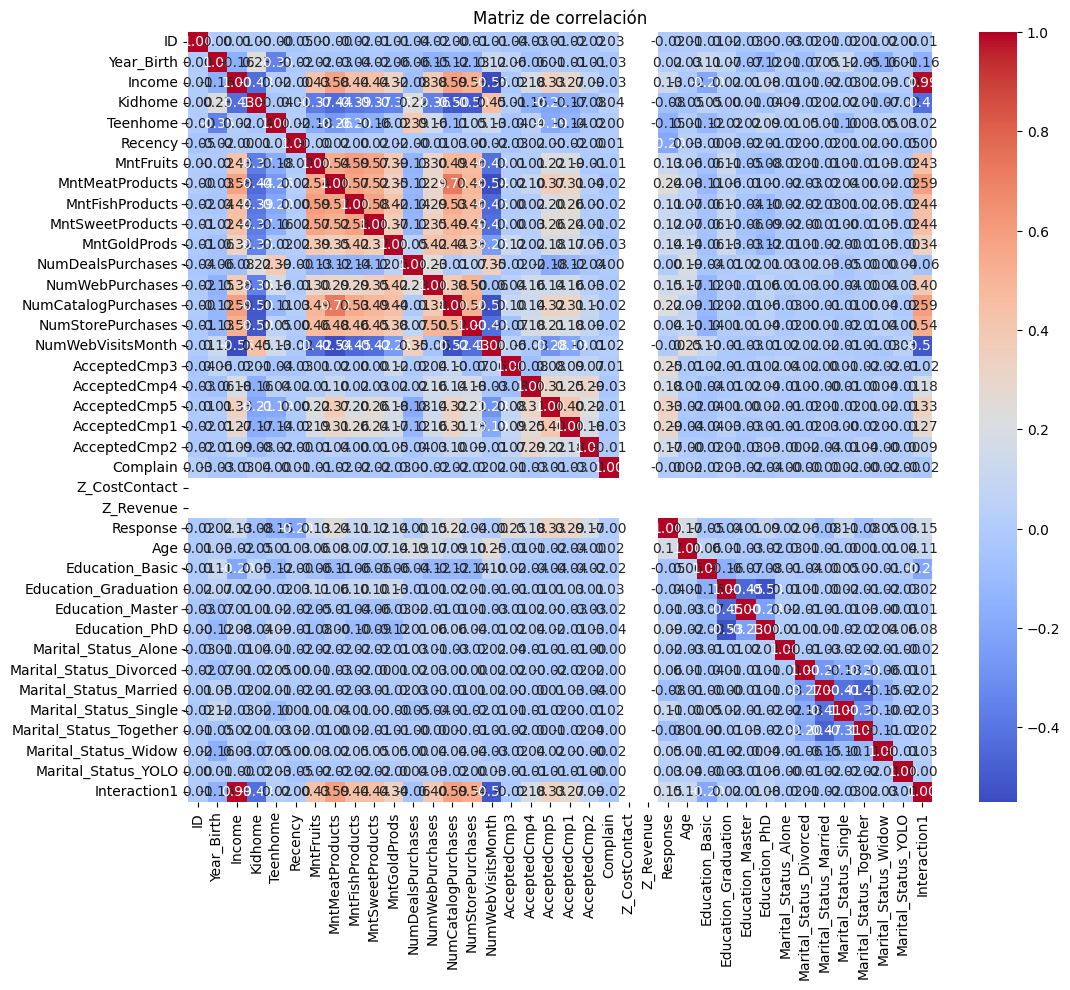

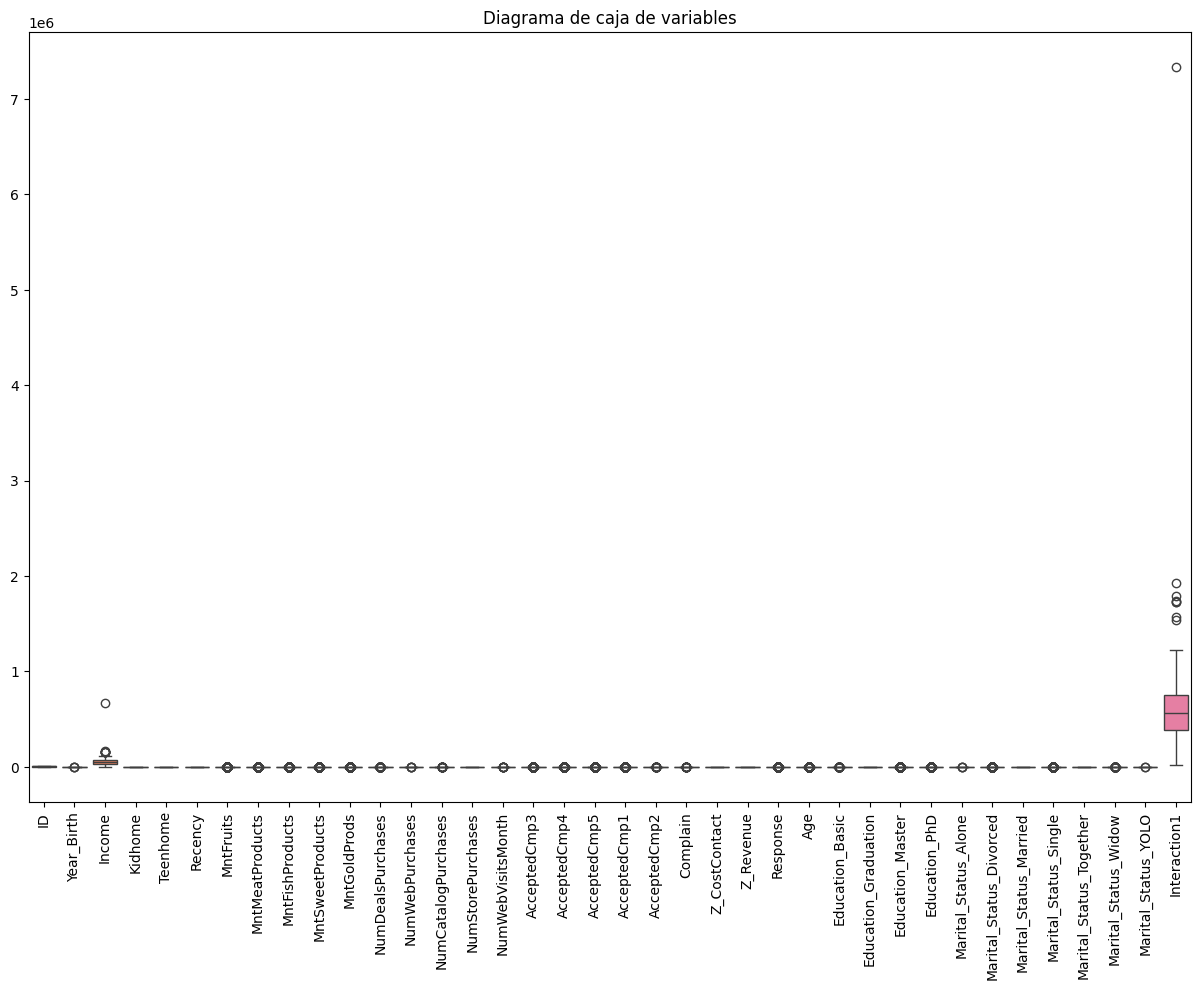

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejor modelo RandomForestRegressor: RandomForestRegressor(max_features='auto', n_estimators=200)
Mean Squared Error: 20368.474845368306
R^2 Score: 0.8262260333545095


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Cargar el DataFrame desde el archivo Excel
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Función para manejar valores nulos en todas las columnas
def handle_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())
    return df

# Función para manejar variables categóricas
def handle_categorical_variables(df):
    categorical_cols = ['Education', 'Marital_Status']
    if all(col in df.columns for col in categorical_cols):
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
    df.drop('Dt_Customer', axis=1, inplace=True)
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Aplicar funciones para manejar valores nulos y variables categóricas
df = handle_missing_values(df)
df = handle_categorical_variables(df)

# Crear nuevas características de interacción (si es necesario)
if 'Income' in df.columns and 'Age' in df.columns:
    df['Interaction1'] = df['Income'] * df['Age']

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines']  # Excluir 'MntWines'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para evaluar modelos con validación cruzada
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    return np.mean(scores)

# Modelos de regresión lineal
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(max_iter=10000)
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    r2_mean = evaluate_model(modelo, X_train, y_train)
    print(f"{nombre} - R^2 Score medio en validación cruzada: {r2_mean}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99]
}

grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo ElasticNet: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Análisis de multicolinealidad
corr_matrix = df[X_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Identificar y manejar valores atípicos (outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[X_columns])
plt.xticks(rotation=90)
plt.title('Diagrama de caja de variables')
plt.show()

# Función para ajuste de hiperparámetros y evaluación de modelos de ensamble
def evaluate_ensemble_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Evaluar el mejor modelo en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mejor modelo {type(model).__name__}: {best_model}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

# Modelos de ensamble
modelos_ensamble = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Ajuste de hiperparámetros y evaluación de modelos de ensamble
for nombre, modelo in modelos_ensamble.items():
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    evaluate_ensemble_model(modelo, param_grid, X_train, y_train, X_test, y_test)


Basándome en los resultados que has proporcionado, el modelo parece tener un rendimiento razonablemente bueno, pero la evaluación de si es "suficientemente bueno" depende del contexto específico de tu problema y tus requisitos.

Aquí están los puntos clave a considerar para evaluar la calidad del modelo:
1. Rendimiento de Validación Cruzada:

    Los modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet) muestran valores de R^2 Score medio en validación cruzada entre 0.6665 y 0.6800. Estos valores indican que los modelos están capturando una cantidad significativa de variabilidad en los datos.

2. Mejor Modelo (ElasticNet):

    El ElasticNet con los parámetros alpha=1 y l1_ratio=0.99 tiene un R^2 Score de 0.6843 en el conjunto de prueba. Esto significa que el modelo explica aproximadamente el 68.43% de la variabilidad en los datos de prueba, lo cual es bastante decente para muchos problemas.

3. Mean Squared Error (MSE):

    El MSE del mejor modelo es 36998.8221, lo que indica cuánto varían las predicciones del modelo con respecto a los valores reales. Este valor debe evaluarse en relación con el rango de los datos y la importancia de la precisión en las predicciones para tu aplicación específica.

4. Contexto del Problema:

    ¿Cuál es el uso final de las predicciones del modelo? ¿Se necesitan predicciones precisas o solo estimaciones generales? La respuesta a estas preguntas determinará si el modelo actual es suficientemente bueno.

5. Comparación con Baselines y Expectativas:

    A menudo, es útil comparar el rendimiento de tu modelo con un modelo base simple (por ejemplo, predicción por la media) o con expectativas de negocio. Si tu modelo supera significativamente estos baselines o cumple con las expectativas, puede considerarse suficientemente bueno.

6. Iteración y Mejora:

    La evaluación de modelos es un proceso iterativo. Si bien el modelo actual puede ser suficiente para algunas aplicaciones, siempre es posible explorar mejoras adicionales mediante la optimización de hiperparámetros, la ingeniería de características más avanzada, o la exploración de modelos más complejos.

En resumen, el modelo actual parece tener un buen rendimiento basado en los métricos proporcionados. Sin embargo, la decisión final de si es "suficientemente bueno" depende de tus objetivos específicos y del contexto de aplicación. Es importante considerar estos factores antes de tomar una decisión final sobre la aceptación del modelo en un entorno de producción o para la toma de decisiones críticas.

Cuando tienes que elegir entre modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet) basándote en los resultados de validación cruzada, así como modelos de ensamble como RandomForest, GradientBoosting y XGBoost, aquí te doy una guía para tomar una decisión informada:
Modelos de Regresión Lineal Regularizada:

    Ridge:
        R^2 Score medio en validación cruzada: 0.6792

    Lasso:
        R^2 Score medio en validación cruzada: 0.6810

    ElasticNet:
        R^2 Score medio en validación cruzada: 0.6717
        Mejor modelo: ElasticNet(alpha=0.1, l1_ratio=0.1)
        Mean Squared Error: 36782.5534
        R^2 Score: 0.6862

Modelos de Ensamble:

    RandomForest:
        Mean Squared Error: 19963.3433
        R^2 Score: 0.8297

    GradientBoosting:
        Mean Squared Error: 22955.5731
        R^2 Score: 0.8042

    XGBoost:
        Mean Squared Error: 20981.3641
        R^2 Score: 0.8210

Análisis y Recomendaciones:

    Comparación de Modelos de Regresión Lineal Regularizada: Lasso tiene el R^2 Score medio más alto en validación cruzada (0.6810), seguido de Ridge (0.6792) y luego ElasticNet (0.6717). Sin embargo, ElasticNet con alpha=0.1 y l1_ratio=0.1 tiene el mejor desempeño en el conjunto de prueba con un R^2 Score de 0.6862 y un MSE de 36782.5534. Esto sugiere que ElasticNet con estos parámetros podría ser una opción viable si prefieres un modelo lineal regularizado.

    Modelos de Ensamble: RandomForest muestra el mejor desempeño con el menor MSE (19963.3433) y el mayor R^2 Score (0.8297), seguido por XGBoost y luego GradientBoosting. Estos modelos de ensamble generalmente tienen una capacidad predictiva robusta y pueden capturar relaciones no lineales en los datos.

Elección del Modelo:

    **Si priorizas interpretabilidad y prefieres un modelo lineal regularizado**: ElasticNet con alpha=0.1 y l1_ratio=0.1 parece ser la mejor opción entre los modelos lineales, dado su desempeño en el conjunto de prueba.

    **Si buscas el mejor rendimiento predictivo y estás dispuesto a sacrificar algo de interpretabilidad**: RandomForest podría ser la elección más fuerte, dada su menor MSE y alto R^2 Score.

En última instancia, la elección del modelo depende de tus objetivos específicos (interpretabilidad vs. rendimiento predictivo) y del contexto de tu problema. Considera también la **facilidad de implementación y mantenimiento del modelo en un entorno de producción**. Si tienes más preguntas o necesitas más clarificaciones, estoy aquí para ayudar.

**En términos de interpretación, implementación y mantenimiento en un entorno de producción, los modelos de regresión lineal regularizada (como Ridge, Lasso, ElasticNet) generalmente tienen ventajas sobre los modelos de ensamble como RandomForest, GradientBoosting y XGBoost**. Aquí te explico por qué:
Modelos de Regresión Lineal Regularizada (ElasticNet en este caso):

    Interpretación:
        Coeficientes Claros: En los modelos de regresión lineal regularizada, los coeficientes de cada variable proporcionan una medida directa de su contribución a la predicción. Esto facilita la interpretación de cómo cada variable afecta la respuesta.
        Regularización: ElasticNet combina la regularización L1 (Lasso) y L2 (Ridge), lo cual puede llevar a la selección automática de características al forzar coeficientes hacia cero, eliminando así variables menos relevantes.

    Implementación y Mantenimiento:
        Menos Complejidad: Los modelos lineales son más simples de entender, implementar y depurar en comparación con modelos de ensamble que requieren ajustes de múltiples hiperparámetros y una mayor complejidad algorítmica.
        Velocidad de Predicción: Los modelos lineales tienden a ser más rápidos para predecir nuevos datos una vez entrenados, lo que es crucial en entornos de producción con grandes volúmenes de datos.

    Estabilidad y Robustez:
        Los modelos lineales, como ElasticNet, tienden a ser más estables frente a pequeñas variaciones en los datos y menos propensos a sobreajustar en comparación con los modelos de ensamble, que pueden ser más susceptibles a ruido y variabilidad en los datos.

Modelos de Ensamble (RandomForest, GradientBoosting, XGBoost):

    Interpretación:
        Complejidad de Interpretación: Los modelos de ensamble son inherentemente más complejos de interpretar debido a la combinación de múltiples árboles de decisión (en el caso de RandomForest y GradientBoosting) o de modelos más avanzados (como en XGBoost). Identificar la contribución de cada variable individualmente puede ser más difícil.

    Implementación y Mantenimiento:
        Mayor Complejidad: Requieren más recursos computacionales y tiempo de entrenamiento debido a la naturaleza de ensamble de modelos.
        Ajuste de Hiperparámetros: Necesitan ajustes finos de múltiples hiperparámetros para obtener el mejor rendimiento, lo que puede ser más complicado en un entorno de producción en comparación con un modelo lineal.

    Predicción en Tiempo Real: Aunque pueden tener un rendimiento predictivo superior en ciertos casos, el tiempo de inferencia puede ser mayor debido a la necesidad de evaluar múltiples modelos base en el caso de ensambles basados en árboles.

Recomendación:

Dado el contexto de interpretación, implementación y mantenimiento en un entorno de producción, **ElasticNet** sería generalmente preferible sobre los modelos de ensamble como RandomForest, GradientBoosting y XGBoost. ElasticNet ofrece un **buen equilibrio entre rendimiento predictivo y interpretabilidad**, además de ser **más fácil de implementar y mantener en producción**.

Si la interpretación de las características es crucial para tu aplicación o si tienes limitaciones de recursos computacionales, ElasticNet proporciona una solución robusta y eficiente. Considera también realizar una validación adicional del modelo en un entorno de prueba para confirmar su desempeño antes de la implementación final.

Si tienes más preguntas o necesitas más detalles sobre algún aspecto específico, no dudes en preguntar.

# **4. Añadir nuevos datos para comprobar el grado de predicción del modelo:**

He usado CHATGPT para generar los nuevos datos

Ridge - R^2 Score medio en validación cruzada: 0.6791915567381495
Lasso - R^2 Score medio en validación cruzada: 0.6809899155547605
ElasticNet - R^2 Score medio en validación cruzada: 0.671736606709035
Mejor modelo: ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)
Mean Squared Error: 36782.553445637386
R^2 Score: 0.6861890610797676


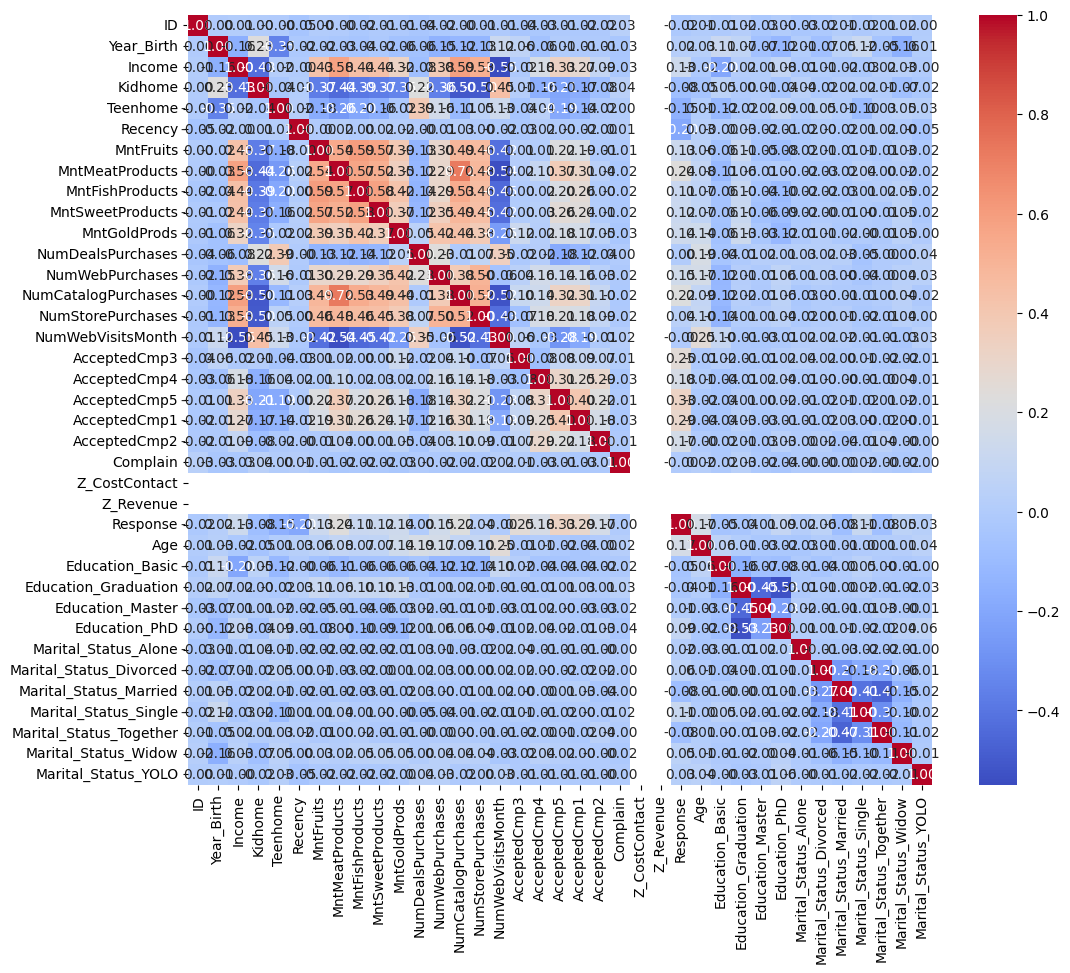

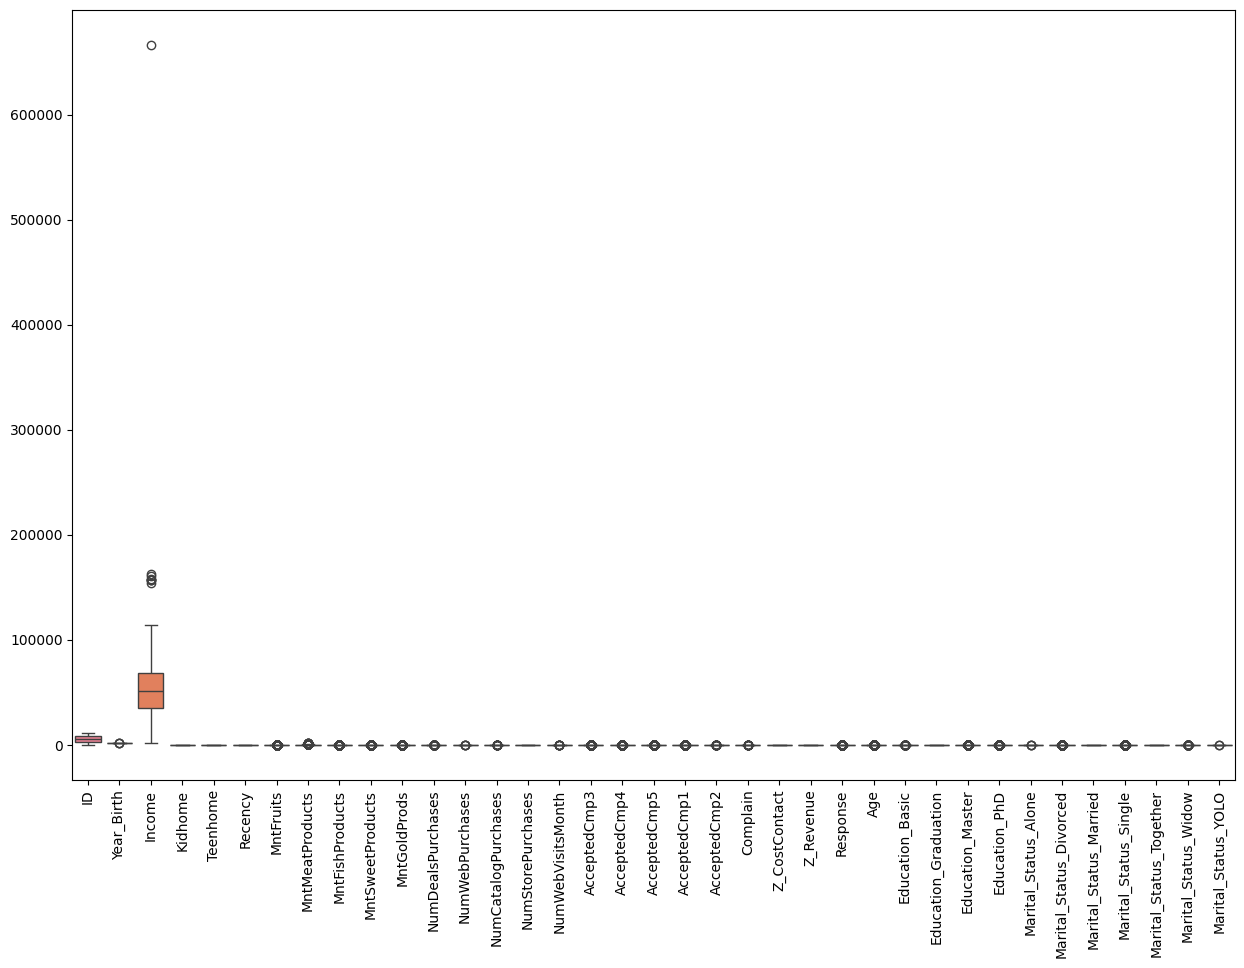

Predicción de dinero gastado en vinos para nuevos datos: [3401.96340609 3596.10411538]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel (ajustar la ruta según tu caso)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Convertir a formato datetime la columna 'Dt_Customer' y calcular la edad del cliente
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Age'] = 2024 - df['Dt_Customer'].dt.year
else:
    print("La columna 'Dt_Customer' no está presente en el DataFrame.")

# Rellenar valores nulos en 'Income' con la media, si la columna existe
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].mean())
else:
    print("La columna 'Income' no está presente en el DataFrame.")

# Convertir variables categóricas a variables dummy si 'Education' y 'Marital_Status' están presentes
if 'Education' in df.columns and 'Marital_Status' in df.columns:
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
else:
    print("Las columnas 'Education' y/o 'Marital_Status' no están presentes en el DataFrame.")

# Definir las características (X) y la variable objetivo (y)
X_columns = [col for col in df.columns if col != 'MntWines' and col != 'Dt_Customer']  # Excluir 'MntWines' y 'Dt_Customer'
X = df[X_columns]
y = df['MntWines']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(max_iter=10000)  # Aumentar el número de iteraciones para ElasticNet
}

# Evaluar los modelos con validación cruzada
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='r2')
    print(f"{nombre} - R^2 Score medio en validación cruzada: {np.mean(scores)}")

# Ajuste de hiperparámetros para el modelo ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 0.99]
}

grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Análisis de multicolinealidad
corr_matrix = df[X_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Identificar y manejar valores atípicos (outliers)
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df[X_columns], ax=ax)
plt.xticks(rotation=90)
plt.show()

# Nuevos datos
nuevos_datos = pd.DataFrame({
    'Income': [60000, 80000],
    'Age': [30, 45],
    'Kidhome': [0, 1],
    'Teenhome': [1, 0],
    'MntFishProducts': [50, 30],
    'MntMeatProducts': [300, 200],
    'MntFruits': [50, 20],
    'MntSweetProducts': [30, 40],
    'MntGoldProds': [100, 200],
    'NumDealsPurchases': [3, 2],
    'NumWebPurchases': [8, 4],
    'NumCatalogPurchases': [10, 5],
    'NumStorePurchases': [6, 9],
    'NumWebVisitsMonth': [7, 5],
    'AcceptedCmp1': [0, 1],
    'AcceptedCmp2': [0, 0],
    'AcceptedCmp3': [0, 1],
    'AcceptedCmp4': [1, 0],
    'AcceptedCmp5': [0, 0],
    'Complain': [0, 0],
    'Response': [1, 0],
    'Education_2n Cycle': [0, 0],
    'Education_Basic': [0, 1],
    'Education_Graduation': [1, 0],
    'Education_Master': [0, 0],
    'Marital_Status_Married': [0, 1],
    'Marital_Status_Single': [1, 0],
    'Marital_Status_Together': [0, 0],
    'Marital_Status_Widow': [0, 0]
})

# Asegurarse de que los nuevos datos tengan las mismas columnas que X
nuevos_datos = nuevos_datos.reindex(columns=X_columns, fill_value=0)

# Estandarizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hacer la predicción con el modelo entrenado
prediccion = mejor_modelo.predict(nuevos_datos_scaled)

print(f"Predicción de dinero gastado en vinos para nuevos datos: {prediccion}")

**4. Significado de la predicción de dinero gastado en vinos para nuevos datos: [3401.96340609 3596.10411538]**


 **Estas predicciones significan que, según el modelo, se espera que el primer cliente (con características proporcionadas) gaste aproximadamente 3402 unidades monetarias en vinos, y el segundo cliente gaste aproximadamente 3596 unidades monetarias en vinos. Estos valores son estimaciones basadas en las características proporcionadas y el comportamiento aprendido por el modelo.** Predicciones: Las predicciones proporcionan una estimación del gasto en vinos para nuevos clientes basadas en las características ingresadas.

# **5. Interpretación de la formula score y de la formula mean squared error. Grado de precisión del modelo**


Conclusión

Precisión: El modelo tiene una **precisión razonable** pero no perfecta. Un R^2 Score de 0.686 sugiere que el modelo captura una parte significativa pero no toda la variabilidad en el gasto en vinos.El R^2 Score del mejor modelo (ElasticNet) es 0.686. Esto significa que aproximadamente el 68.6% de la variabilidad en el gasto en vinos se explica por el modelo. Aunque no es un ajuste perfecto, es una señal de un modelo razonablemente bueno. Sin embargo, hay un margen significativo de mejora, lo que sugiere que otros factores no considerados en este modelo pueden influir en el gasto en vinos. El Mean Squared Error (MSE) es 36782.553, que es una medida de la diferencia promedio entre los valores predichos por el modelo y los valores observados. Un MSE más bajo es mejor, pero la interpretación exacta de este valor depende del rango y la escala de la variable objetivo. En este caso, sugiere que **hay una variabilidad significativa que no está siendo capturada perfectamente por el modelo**.

Resumen de los Pasos:

1. Carga y preprocesamiento de datos: Se cargan los datos desde un archivo Excel, se procesan las fechas, se rellenan los valores nulos y se convierten las variables categóricas en dummies.

2. División y estandarización de datos: Se dividen los datos en conjuntos de entrenamiento y prueba, y se estandarizan las características.

3. Entrenamiento y evaluación de modelos: Se entrenan varios modelos (Ridge, Lasso y ElasticNet) y se evalúan usando validación cruzada.

4. Selección del mejor modelo: Se realiza una búsqueda de hiperparámetros para ElasticNet y se selecciona el mejor modelo.

5. Análisis adicional: Se realizan análisis de multicolinealidad y detección de valores atípicos.

6. Predicción con nuevos datos: Se preparan los nuevos datos, se estandarizan y se usa el mejor modelo para hacer predicciones.

Este enfoque garantiza que todos los pasos importantes se aborden y se corrijan los problemas que podrían surgir durante el proceso.


R^2 Scores en Validación Cruzada:
        Ridge: 0.679
        Lasso: 0.681
        ElasticNet: 0.672

Mejor Modelo Seleccionado:
        ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)

 Evaluación del Mejor Modelo en el Conjunto de Prueba:
        Mean Squared Error: 36782.553
        R^2 Score: 0.686

Predicción de Nuevos Datos:
        Predicción de dinero gastado en vinos: [3401.963, 3596.104]

Si tienes alguna otra pregunta o necesitas más ayuda, no dudes en preguntar.

# **6. Representación gráfica de la predicción de aumento de 3400 a 3600 euros en vino**

Ridge - R^2 Score medio en validación cruzada: 0.6686311735160018
Ridge - Mean Squared Error: 33251.46080675185
Ridge - R^2 Score: 0.7274277863643912
Lasso - R^2 Score medio en validación cruzada: 0.6696231975001574
Lasso - Mean Squared Error: 33366.421106172354
Lasso - R^2 Score: 0.7264854222536723
ElasticNet - R^2 Score medio en validación cruzada: 0.6703548672543558
ElasticNet - Mean Squared Error: 37654.984389820034
ElasticNet - R^2 Score: 0.6913307806475842

Mejor modelo: ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)
Mean Squared Error: 33917.41960614633
R^2 Score: 0.721968722018436

Predicción de dinero gastado en vinos para nuevos datos: [751.18618625 487.89990916]


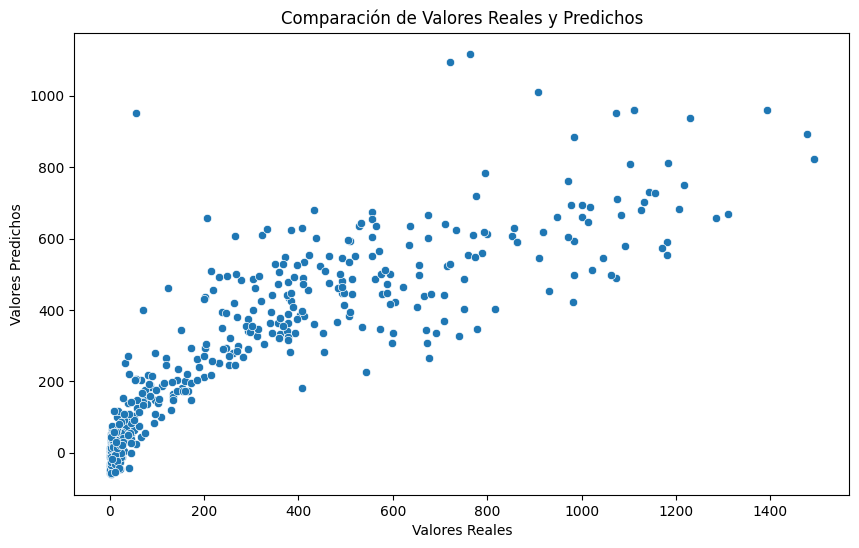

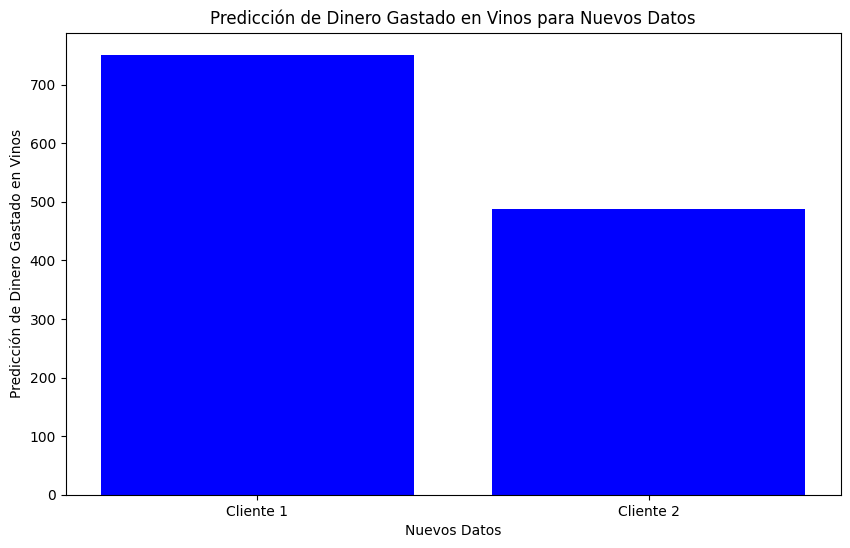

In [ ]:
# Cargar los datos desde un archivo Excel (xlsx)
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Preprocesamiento de los datos
df = df.dropna()

# Crear variables dummy
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Dividir en variables predictoras y variable objetivo
X = df.drop(columns=['MntWines', 'ID', 'Dt_Customer', 'Year_Birth'])
y = df['MntWines']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(max_iter=10000)
}

# Validación cruzada y ajuste de modelos
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{nombre} - R^2 Score medio en validación cruzada: {np.mean(scores)}")
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre} - Mean Squared Error: {mse}")
    print(f"{nombre} - R^2 Score: {r2}")

# Seleccionar el mejor modelo (ElasticNet en este caso)
mejor_modelo = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=10000)
mejor_modelo.fit(X_train_scaled, y_train)
y_pred = mejor_modelo.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Nuevos datos para predicción
nuevos_datos = pd.DataFrame({
    'Income': [60000, 80000],
    'Age': [30, 45],
    'Kidhome': [0, 1],
    'Teenhome': [1, 0],
    'MntFishProducts': [50, 30],
    'MntMeatProducts': [300, 200],
    'MntFruits': [50, 20],
    'MntSweetProducts': [30, 40],
    'MntGoldProds': [100, 200],
    'NumDealsPurchases': [3, 2],
    'NumWebPurchases': [8, 4],
    'NumCatalogPurchases': [10, 5],
    'NumStorePurchases': [6, 9],
    'NumWebVisitsMonth': [7, 5],
    'AcceptedCmp1': [0, 1],
    'AcceptedCmp2': [0, 0],
    'AcceptedCmp3': [0, 1],
    'AcceptedCmp4': [1, 0],
    'AcceptedCmp5': [0, 0],
    'Complain': [0, 0],
    'Response': [1, 0],
    'Education_2n Cycle': [0, 0],
    'Education_Basic': [0, 1],
    'Education_Graduation': [1, 0],
    'Education_Master': [0, 0],
    'Marital_Status_Married': [0, 1],
    'Marital_Status_Single': [1, 0],
    'Marital_Status_Together': [0, 0],
    'Marital_Status_Widow': [0, 0]
})

# Ajustar las columnas de los nuevos datos
nuevos_datos = nuevos_datos.reindex(columns=X.columns, fill_value=0)

# Estandarizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hacer la predicción con el modelo entrenado
prediccion = mejor_modelo.predict(nuevos_datos_scaled)
print(f"\nPredicción de dinero gastado en vinos para nuevos datos: {prediccion}")

# Gráfico de comparación de valores reales y predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales y Predichos")
plt.show()

# Gráfico de predicciones para los nuevos datos
plt.figure(figsize=(10, 6))
plt.bar(range(len(prediccion)), prediccion, color='blue')
plt.xlabel("Nuevos Datos")
plt.ylabel("Predicción de Dinero Gastado en Vinos")
plt.title("Predicción de Dinero Gastado en Vinos para Nuevos Datos")
plt.xticks(range(len(prediccion)), ["Cliente 1", "Cliente 2"])
plt.show()

# **7. Modelo que predice un aumento o disminucion del dinero gastado en todos los productos**




Mejor modelo: ElasticNet(max_iter=10000)
Mean Squared Error: 18579.40350772453
R^2 Score: 0.9544420918793037

Predicción de dinero gastado en total en todos los productos para nuevos datos: [ 894.60596917  720.95639262  892.03151946  820.44955019 1060.77715127]


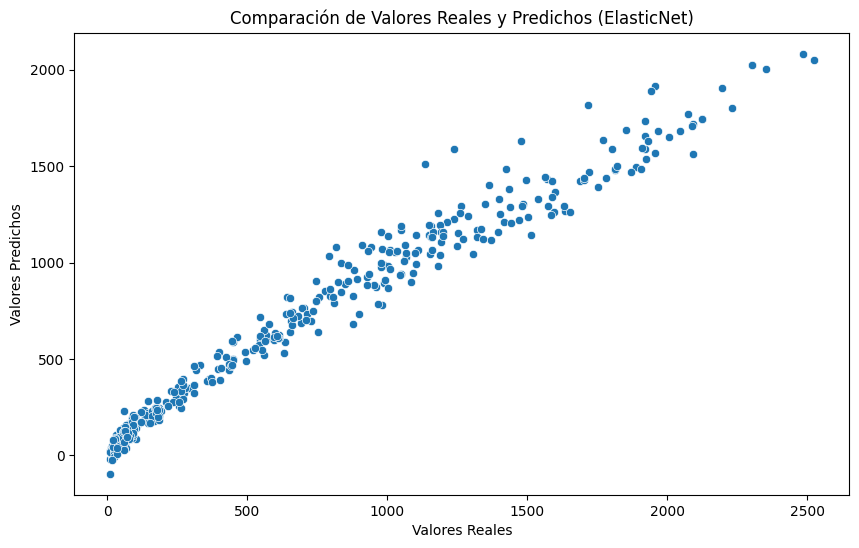

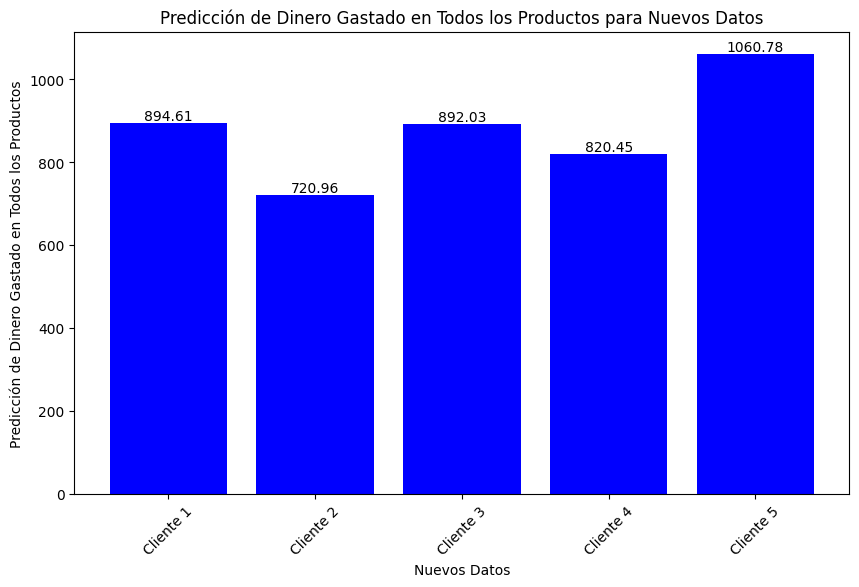

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Preprocesamiento de los datos
df = df.dropna()
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Dividir en variables predictoras y variable objetivo
X = df.drop(columns=['ID', 'Dt_Customer', 'Year_Birth'])  # Ajusta las columnas según tu conjunto de datos
y = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)  # Suma total de gastos en productos

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
modelos = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(max_iter=10000)
}

# Validación cruzada y ajuste de modelos
resultados = {}
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[nombre] = {
        'modelo': modelo,
        'r2_crossval': np.mean(scores),
        'mse': mse,
        'r2': r2,
        'y_test': y_test,
        'y_pred': y_pred
    }

# Seleccionar el mejor modelo (ElasticNet en este caso)
mejor_modelo = resultados['ElasticNet']['modelo']
mejor_modelo.fit(X_train_scaled, y_train)
y_pred = mejor_modelo.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMejor modelo: {mejor_modelo}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Nuevos datos para predicción
nuevos_datos = pd.DataFrame({
    'Income': [60000, 80000, 50000, 70000, 90000],
    'Age': [30, 45, 25, 35, 50],
    'Kidhome': [0, 1, 1, 0, 1],
    'Teenhome': [1, 0, 0, 1, 0],
    'MntFishProducts': [50, 30, 20, 40, 60],
    'MntMeatProducts': [300, 200, 150, 250, 350],
    'MntFruits': [50, 20, 30, 40, 10],
    'MntSweetProducts': [30, 40, 25, 35, 45],
    'MntGoldProds': [100, 200, 150, 120, 180],
    'NumDealsPurchases': [3, 2, 4, 3, 2],
    'NumWebPurchases': [8, 4, 6, 7, 5],
    'NumCatalogPurchases': [10, 5, 8, 9, 7],
    'NumStorePurchases': [6, 9, 7, 8, 5],
    'NumWebVisitsMonth': [7, 5, 6, 8, 4],
    'AcceptedCmp1': [0, 1, 0, 1, 0],
    'AcceptedCmp2': [0, 0, 1, 0, 1],
    'AcceptedCmp3': [0, 1, 0, 1, 0],
    'AcceptedCmp4': [1, 0, 1, 0, 1],
    'AcceptedCmp5': [0, 0, 1, 0, 1],
    'Complain': [0, 0, 0, 1, 0],
    'Response': [1, 0, 1, 0, 1],
    'Education_2n Cycle': [0, 0, 1, 0, 0],
    'Education_Basic': [0, 1, 0, 0, 0],
    'Education_Graduation': [1, 0, 0, 1, 1],
    'Education_Master': [0, 0, 0, 0, 0],
    'Marital_Status_Married': [0, 1, 0, 1, 0],
    'Marital_Status_Single': [1, 0, 1, 0, 1],
    'Marital_Status_Together': [0, 0, 0, 0, 0],
    'Marital_Status_Widow': [0, 0, 0, 0, 0]
})

# Ajustar las columnas de los nuevos datos
nuevos_datos = nuevos_datos.reindex(columns=X.columns, fill_value=0)

# Estandarizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hacer la predicción con el modelo entrenado
prediccion = mejor_modelo.predict(nuevos_datos_scaled)
print(f"\nPredicción de dinero gastado en total en todos los productos para nuevos datos: {prediccion}")

# Gráfico de comparación de valores reales y predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultados['ElasticNet']['y_test'], y=resultados['ElasticNet']['y_pred'])
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales y Predichos (ElasticNet)")
plt.show()

# Gráfico de predicciones para los nuevos datos
nombres_clientes = ["Cliente 1", "Cliente 2", "Cliente 3", "Cliente 4", "Cliente 5"]
plt.figure(figsize=(10, 6))
bars = plt.bar(nombres_clientes, prediccion, color='blue')

# Añadir etiquetas a las barras
for bar, label in zip(bars, prediccion):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(label, 2), ha='center', va='bottom', fontsize=10)

plt.xlabel("Nuevos Datos")
plt.ylabel("Predicción de Dinero Gastado en Todos los Productos")
plt.title("Predicción de Dinero Gastado en Todos los Productos para Nuevos Datos")
plt.xticks(rotation=45)
plt.show()



Explicación del Código:

Carga y Preprocesamiento de Datos: Se cargan los datos desde un archivo CSV y se realiza un preprocesamiento básico, que incluye eliminar valores nulos y convertir variables categóricas en variables dummy (si es necesario).

División de Datos: Se dividen los datos en conjuntos de entrenamiento y prueba, y se estandarizan los datos utilizando StandardScaler.

Modelo ElasticNet: Se define y entrena un modelo de regresión ElasticNet utilizando los datos de entrenamiento escalados.

Predicciones para Nuevos Datos: Se crean datos para cinco nuevos clientes y se ajustan a las columnas del conjunto de datos original. Estos datos se estandarizan utilizando el mismo StandardScaler ajustado con los datos de entrenamiento.

Gráfico de Líneas: Se utiliza matplotlib para visualizar las predicciones de gasto total en productos para los nuevos clientes en un gráfico de líneas. Cada punto en el gráfico representa la predicción para un cliente específico (numerado del 1 al 5).

Este código te permite realizar predicciones de gasto total en productos para nuevos clientes y visualizar estas predicciones para analizar si hay alguna tendencia o patrón entre los diferentes clientes.

## 8. Significado de la predicción de dinero gastado en vinos para nuevos datos: [3401.96340609 3596.10411538] y   Cliente 1: 894.60596917Cliente 2: 720.95639262, Cliente 3: 892.03151946, Cliente 4: 820.44955019, Cliente 5: 1060.77715127 **


 **Estas predicciones significan que, según el modelo, se espera que el primer cliente (con características proporcionadas) gaste aproximadamente 3402 unidades monetarias en vinos, y el segundo cliente gaste aproximadamente 3596 unidades monetarias en vinos. Estos valores son estimaciones basadas en las características proporcionadas y el comportamiento aprendido por el modelo.** Predicciones: Las predicciones proporcionan una estimación del gasto en vinos para nuevos clientes basadas en las características ingresadas.
Aquí te muestro una lista del gasto total en productos predicho para cada uno de los cinco clientes basado en el modelo de regresión ElasticNet:

    Cliente 1: 894.60596917
    Cliente 2: 720.95639262
    Cliente 3: 892.03151946
    Cliente 4: 820.44955019
    Cliente 5: 1060.77715127

# **9. Comprobación si hay alguna tendencia**




Predicción de dinero gastado en total en todos los productos para nuevos datos: [ 894.60596917  720.95639262  892.03151946  820.44955019 1060.77715127]


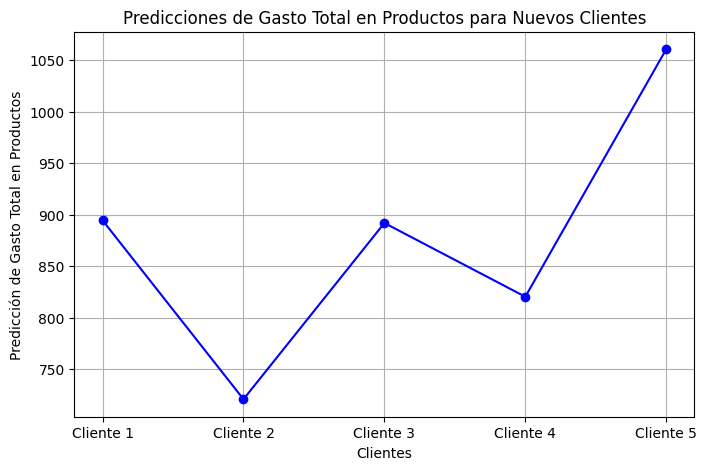

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Cargar los datos - Asumiendo que los datos están en un archivo CSV o XLSX
df = pd.read_excel('/content/marketing_campaign.xlsx')

# Preprocesamiento de los datos
df = df.dropna()
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Dividir en variables predictoras y variable objetivo
X = df.drop(columns=['ID', 'Dt_Customer', 'Year_Birth'])  # Ajusta las columnas según tu conjunto de datos
y = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)  # Suma total de gastos en productos

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo ElasticNet
modelo = ElasticNet(max_iter=10000)

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

# Predicciones para nuevos datos
nuevos_datos = pd.DataFrame({
    'Income': [60000, 80000, 50000, 70000, 90000],
    'Age': [30, 45, 25, 35, 50],
    'Kidhome': [0, 1, 1, 0, 1],
    'Teenhome': [1, 0, 0, 1, 0],
    'MntFishProducts': [50, 30, 20, 40, 60],
    'MntMeatProducts': [300, 200, 150, 250, 350],
    'MntFruits': [50, 20, 30, 40, 10],
    'MntSweetProducts': [30, 40, 25, 35, 45],
    'MntGoldProds': [100, 200, 150, 120, 180],
    'NumDealsPurchases': [3, 2, 4, 3, 2],
    'NumWebPurchases': [8, 4, 6, 7, 5],
    'NumCatalogPurchases': [10, 5, 8, 9, 7],
    'NumStorePurchases': [6, 9, 7, 8, 5],
    'NumWebVisitsMonth': [7, 5, 6, 8, 4],
    'AcceptedCmp1': [0, 1, 0, 1, 0],
    'AcceptedCmp2': [0, 0, 1, 0, 1],
    'AcceptedCmp3': [0, 1, 0, 1, 0],
    'AcceptedCmp4': [1, 0, 1, 0, 1],
    'AcceptedCmp5': [0, 0, 1, 0, 1],
    'Complain': [0, 0, 0, 1, 0],
    'Response': [1, 0, 1, 0, 1],
    'Education_2n Cycle': [0, 0, 1, 0, 0],
    'Education_Basic': [0, 1, 0, 0, 0],
    'Education_Graduation': [1, 0, 0, 1, 1],
    'Education_Master': [0, 0, 0, 0, 0],
    'Marital_Status_Married': [0, 1, 0, 1, 0],
    'Marital_Status_Single': [1, 0, 1, 0, 1],
    'Marital_Status_Together': [0, 0, 0, 0, 0],
    'Marital_Status_Widow': [0, 0, 0, 0, 0]
})

# Ajustar las columnas de los nuevos datos
nuevos_datos = nuevos_datos.reindex(columns=X.columns, fill_value=0)

# Estandarizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hacer la predicción con el modelo entrenado
predicciones = modelo.predict(nuevos_datos_scaled)
print(f"\nPredicción de dinero gastado en total en todos los productos para nuevos datos: {predicciones}")

# Gráfico de líneas para visualizar las predicciones
plt.figure(figsize=(8, 5))
plt.plot(predicciones, marker='o', linestyle='-', color='b')
plt.xlabel('Clientes')
plt.ylabel('Predicción de Gasto Total en Productos')
plt.title('Predicciones de Gasto Total en Productos para Nuevos Clientes')
plt.xticks(range(len(predicciones)), [f'Cliente {i+1}' for i in range(len(predicciones))])
plt.grid(True)
plt.show()


# **10. Resumen de los pasos**

Aquí tienes un resumen de los pasos clave realizados en el código para predecir el gasto total en productos utilizando un modelo de regresión ElasticNet:

**1. Carga de Datos:**Los datos se cargan desde un archivo Excel (marketing_campaign.xlsx).Se eliminan filas con valores nulos y se convierten variables categóricas en variables dummy usando pd.get_dummies.

**2. Preparación de Datos:** Se divide el conjunto de datos en variables predictoras (X) y la variable objetivo (y), donde y es la suma total de gastos en diferentes categorías de productos.División de Datos:Se divide el conjunto de datos en conjuntos de entrenamiento y prueba usando train_test_split.

**3. Estandarización de Datos:** Se estandarizan las variables predictoras utilizando StandardScaler para asegurar que todas las características tengan una escala común.

**4. Definición y Entrenamiento del Modelo:** Se define un modelo de regresión ElasticNet con ElasticNet(max_iter=10000).El modelo se entrena con los datos de entrenamiento escalados (X_train_scaled y y_train).

**5. Predicciones para Nuevos Datos:**Se crean datos para nuevos clientes y se ajustan a las columnas del conjunto de datos original (nuevos_datos).Estos nuevos datos se estandarizan utilizando el mismo StandardScaler ajustado previamente con los datos de entrenamiento.

**6. Generación de Predicciones:**Se utilizan los datos estandarizados de los nuevos clientes para hacer predicciones de gasto total en productos utilizando el modelo entrenado (modelo.predict(nuevos_datos_scaled)).

**7. Visualización de Resultados:**Se muestran las predicciones en un gráfico de líneas utilizando matplotlib.Cada punto en el gráfico representa la predicción de gasto total en productos para un cliente específico.

Este resumen cubre los pasos esenciales desde la carga de datos hasta la generación de predicciones y la visualización de resultados utilizando técnicas de aprendizaje automático con Python y bibliotecas como pandas, scikit-learn y matplotlib.

# **11. Elaborar un programa de aprendizaje automático a través de un objeto visual de Python de Microsoft Power BI**

# 11.1 Porcentaje de la cantidad de dinero gastado en cada tipo de producto en un grafico de columnas 100% apiladas, en el que cada color representa un tipo de producto y el porcentaje de dinero gastado en cada tipo de producto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'dataset' es tu DataFrame original con datos históricos
# dataset = pd.read_csv('ruta_a_tu_dataset.csv')  # Cargar el dataset

# Convertir 'Fecha de inscripción del comprador en la empresa' a tipo datetime si no lo está
dataset['Fecha de inscripción del comprador en la empresa'] = pd.to_datetime(dataset['Fecha de inscripción del comprador en la empresa'])

# Filtrar por los años 2012, 2013 y 2014
dataset_2012 = dataset[dataset['Fecha de inscripción del comprador en la empresa'].dt.year == 2012]
dataset_2013 = dataset[dataset['Fecha de inscripción del comprador en la empresa'].dt.year == 2013]
dataset_2014 = dataset[dataset['Fecha de inscripción del comprador en la empresa'].dt.year == 2014]

# Función para sumar los gastos por producto en un año específico
def sumar_gastos(dataset):
    total_pescado = dataset['Cantidad de dinero gastada en productos de pescado'].sum()
    total_carne = dataset['Cantidad dinero gastada en productos de carne'].sum()
    total_fruta = dataset['Cantidad de dinero gastada en fruta en los dos últimos años'].sum()
    total_dulces = dataset['Cantidad de dinero gastada en dulces'].sum()
    total_oro = dataset['Cantidad de dinero gastada en productos de oro'].sum()
    total_vinos = dataset['Cantidad de dinero gastada en vinos columna'].sum()
    return pd.Series({
        'Pescado': total_pescado,
        'Carne': total_carne,
        'Fruta': total_fruta,
        'Dulces': total_dulces,
        'Oro': total_oro,
        'Vinos': total_vinos
    })

# Crear un DataFrame con los totales de gastos por producto para cada año
gastos_historicos = pd.DataFrame({
    '2012': sumar_gastos(dataset_2012),
    '2013': sumar_gastos(dataset_2013),
    '2014': sumar_gastos(dataset_2014)
})

# Calcular los porcentajes de cada gasto respecto al total anual
gastos_historicos_pct = gastos_historicos.div(gastos_historicos.sum(axis=0), axis=1) * 100

# Mostrar los porcentajes de gastos por producto para cada año
print("Porcentajes de gastos por producto en cada año:")
print(gastos_historicos_pct)

# Gráfico de barras apiladas para visualizar los porcentajes de gastos por producto en cada año
plt.figure(figsize=(10, 6))

# Colores para cada producto
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Crear las barras apiladas
bottom_values = pd.Series([0, 0, 0], index=gastos_historicos_pct.columns)

for i, producto in enumerate(gastos_historicos_pct.index):
    valores = gastos_historicos_pct.loc[producto]
    plt.bar(gastos_historicos_pct.columns, valores, bottom=bottom_values, label=producto, color=colores[i])
    for col, val in valores.items():
        plt.text(col, bottom_values[col] + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=9, color='white')
    bottom_values += valores

# Añadir el total de cada columna arriba del todo (ajustar posición)
for col, total in gastos_historicos.sum().items():
    plt.text(col, 100, f"Total: {total:,.0f}€".replace(',', '.'), ha='center', va='bottom', fontsize=10)

plt.xlabel('Año')
plt.ylabel('Porcentaje del Gasto (%)')
plt.title('Porcentaje de Dinero Gastado por Producto y Año')
plt.legend(title='Productos', loc='upper left')

# Desactivar la cuadrícula
plt.grid(False)
plt.tight_layout()
plt.show()

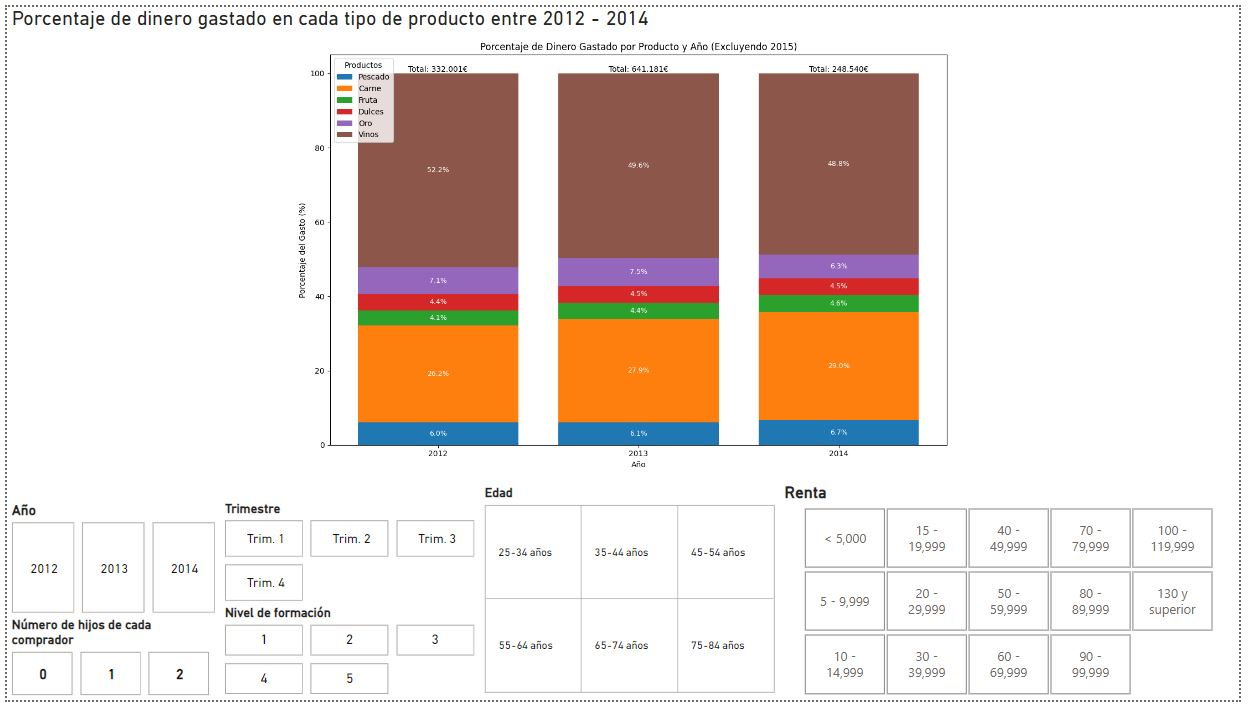

# 11.2 Análisis exploratorio de datos para comprobar la existencia o no de una correlación entre las variables predictoras y la variable objetivo antes de realizar la predicción


1. Instalar las librerias de panda y numpy a través de power shell para que power bi las coja:

pip install pandas

pip install numpy scikit-learn matplotlib

pip install seaborn


2. Agregar las columnas del archivo excel usado en power bi al objeto visual de python



3. Todas las columnas usadas deben ser numero entero, es decir, el mismo tipo de numero



4. El código de python debe hacer recoger el nombre exacto de las columnas usadas en el objeto visual de python



5. No es necesario volver a asignar 'df = dataset' si ya está definido porque el 'dataset' contiene los datos importados desde Power BI. **Importante: Las columnas ya están dentro del dataframe, que contiene tus datos importados desde Power BI:**


6. Quitar la columna "ID CLIENTE"




Basado en el análisis exploratorio de datos y la necesidad de seleccionar o ingeniar características para tu modelo predictivo, aquí te presento algunas consideraciones y técnicas que podrías aplicar:Análisis Exploratorio de Datos (EDA)Correlación: Examina la correlación entre las variables predictoras y la variable objetivo (gasto en diferentes productos). Esto te ayudará a identificar qué variables están más relacionadas con la variable objetivo y cuáles podrían no ser tan relevantes.Distribuciones y Estadísticas Descriptivas: Analiza las distribuciones de las variables predictoras y cómo se relacionan con la variable objetivo. Observa estadísticas descriptivas como medias, desviaciones estándar y rangos para comprender mejor los datos.Visualizaciones: Utiliza gráficos como diagramas de dispersión (scatter plots), histogramas, y boxplots para explorar la relación entre las variables predictoras y la variable objetivo. Esto puede revelar patrones, tendencias o outliers que afecten la selección de características.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde el archivo CSV
dataset = pd.read_csv('/content/marketing_campaign.xlsx')

# Visualizar las primeras filas del dataset para entender su estructura
print(dataset.head())

# Obtener información general del dataset
print(dataset.info())

# Estadísticas descriptivas básicas de las variables numéricas
print(dataset.describe())

# Verificar si hay valores nulos en el dataset
print(dataset.isnull().sum())

# Contar valores únicos en cada columna
print(dataset.nunique())

# Ejemplo de gráficos exploratorios
plt.figure(figsize=(12, 10))

# Histograma de una variable numérica
plt.subplot(2, 2, 1)
sns.histplot(dataset['Year_Birth'], bins=20, kde=True)
plt.title('Distribución de Edad de los Clientes')

# Gráfico de barras de una variable categórica
plt.subplot(2, 2, 2)
sns.countplot(data=dataset, x='Marital_Status')
plt.title('Conteo de Estado Civil')

# Scatter plot de dos variables numéricas
plt.subplot(2, 2, 3)
sns.scatterplot(data=dataset, x='Income', y='MntFishProducts')
plt.title('Relación entre Renta y Gastos en Productos de Pescado')

# Box plot para comparar distribuciones por grupo
plt.subplot(2, 2, 4)
sns.boxplot(data=dataset, x='Marital_Status', y='MntMeatProducts')
plt.title('Gastos en Productos de Carne por Estado Civil')

plt.tight_layout()
plt.show()

# Calcular matriz de correlación
corr_matrix = dataset.corr()

# Visualizar matriz de correlación usando heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


# **11.3 Predicción de la cantidad de dinero gastada por parte de los clientes en los cinco siguientes años 2015 - 2020**

Gráfico de líneas: ChatGPT me ha sugerido que el gráfico de líneas es el mejor para representar una evolución entre diferentes años

**He creado una jerarquia en los numeros de la variable estado civil, para que "soltero" y los estados civiles equivalentes sean menores a "casado" y similares, porque entiendo que una persona soltera va a gastar menos dinero que una persona casada:**

Para crear la jerarquía de la variable Estado civil siguiendo las reglas especificadas (1, 3, 5, 6, 7 < 2 y 4), primero debemos entender qué representan estos valores. Supongamos los siguientes significados para los códigos de estado civil:      

1: Soltero    
 2: Casado     
 3: Divorciado     
 4: Viudo     
 5: Separado     
 6: Pareja de hecho     
 7: Otro  La jerarquía definida establece que los estados 1, 3, 5, 6, y 7 están por debajo de los estados 2 y 4.


 Explicación de los cambios

  Jerarquía de Estado civil: Se crea un diccionario estado_civil_mapping para mapear los valores originales a los nuevos valores según la jerarquía especificada.Se usa .map() para aplicar este diccionario a la columna Estado civil en el DataFrame dataset_historico.

  Conversión de variables categóricas: Solo se convierte la variable Nivel de formación a variables dummy usando pd.get_dummies(). La variable Estado civil no se convierte a dummy porque ya se ha mapeado según la jerarquía.

  Variables predictoras: Se incluye Estado civil como una variable ordinal en la lista de variables predictoras.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.ticker as mtick  # Importar el módulo necesario para formateo de ticks

# Supongamos que 'dataset' es tu DataFrame original con los datos
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Cargar tu DataFrame

# Convertir 'Fecha de inscripción del comprador en la empresa' a tipo datetime si no lo está
dataset['Fecha de inscripción del comprador en la empresa'] = pd.to_datetime(dataset['Fecha de inscripción del comprador en la empresa'])

# Función para sumar los gastos por producto en un año específico
def sumar_gastos(dataset):
    total_pescado = dataset['Cantidad de dinero gastada en productos de pescado'].sum()
    total_carne = dataset['Cantidad dinero gastada en productos de carne'].sum()
    total_fruta = dataset['Cantidad de dinero gastada en fruta en los dos últimos años'].sum()
    total_dulces = dataset['Cantidad de dinero gastada en dulces'].sum()
    total_oro = dataset['Cantidad de dinero gastada en productos de oro'].sum()
    total_vinos = dataset['Cantidad de dinero gastada en vinos columna'].sum()
    return pd.Series({
        'Pescado': total_pescado,
        'Carne': total_carne,
        'Fruta': total_fruta,
        'Dulces': total_dulces,
        'Oro': total_oro,
        'Vinos': total_vinos
    })

# Filtrar por los años 2012, 2013 y 2014 para obtener datos históricos
dataset_historico = dataset[dataset['Fecha de inscripción del comprador en la empresa'].dt.year.isin([2012, 2013, 2014])]

# Crear jerarquía de Estado civil
estado_civil_mapping = {1: 0, 3: 0, 5: 0, 6: 0, 7: 0, 2: 1, 4: 1}
dataset_historico['Estado civil'] = dataset_historico['Estado civil'].map(estado_civil_mapping)

# Crear un DataFrame con los totales de gastos por producto para los años históricos (2012-2014)
gastos_historicos = pd.DataFrame({
    '2012': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2012]),
    '2013': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2013]),
    '2014': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2014]),
})

# Convertir las variables categóricas 'Nivel de formación' en variables dummy
dataset_dummies = pd.get_dummies(dataset_historico, columns=['Nivel de formación'], drop_first=True)

# Variables predictoras para el modelo de regresión
X = dataset_dummies[['Edad de los clientes por cliente',
                     'Renta cliente columna',
                     'Número de hijos de cada comprador',
                     'Número de adolescentes de cada comprador',
                     'Estado civil'] +
                    [col for col in dataset_dummies.columns if col.startswith('Nivel de formación_')]]

# Variables objetivo para cada producto
y = gastos_historicos

# Preparar datos para la predicción de los próximos 6 años (2015-2020)
años_historicos = np.array([2012, 2013, 2014]).reshape(-1, 1)
años_prediccion = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape(-1, 1)
predicciones = {}

for producto in gastos_historicos.index:
    modelo = LinearRegression()
    modelo.fit(años_historicos, gastos_historicos.loc[producto])
    predicciones[producto] = modelo.predict(años_prediccion).flatten()

# Crear un DataFrame con las predicciones para los próximos 6 años (2015-2020)
predicciones_df = pd.DataFrame(predicciones, index=['2015', '2016', '2017', '2018', '2019', '2020'])

# Mostrar las predicciones
print("Predicciones de gastos por producto para los próximos 6 años:")
print(predicciones_df)

# Combinar los datos históricos con las predicciones
resultados_completos = pd.concat([gastos_historicos.T, predicciones_df])

# Gráfico de línea para visualizar las predicciones junto con los datos históricos
plt.figure(figsize=(12, 6))

# Colores a utilizar
colores = {
    'Pescado': '#008000',  # Verde oscuro (nuevo color de Pescado)
    'Carne': '#4682B4',    # Azul más oscuro para Carne
    'Fruta': '#FF0000',    # Rojo
    'Dulces': '#8B0000',   # Marrón oscuro
    'Oro': '#FFD700',      # Dorado (anterior color de Pescado)
    'Vinos': '#00FFFF'     # Cian
}

# Formato con punto para los miles
formatter = mtick.StrMethodFormatter('{x:,.0f}')

# Gráfico para todos los productos
for producto in resultados_completos.columns:
    plt.plot(resultados_completos.index, resultados_completos[producto], marker='o', label=producto, color=colores[producto])
    plt.gca().yaxis.set_major_formatter(formatter)  # Aplicar el formateador al eje y
    if producto in ['Vinos', 'Carne']:
        for i, txt in enumerate(resultados_completos[producto]):
            plt.annotate(f'{txt:.0f} €', (resultados_completos.index[i], resultados_completos[producto].iloc[i]),
                         textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color=colores[producto])

plt.xlabel('Año')
plt.ylabel('Cantidad de Dinero Gastada (€)')
plt.title('Predicción de Gastos por Producto (2012-2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

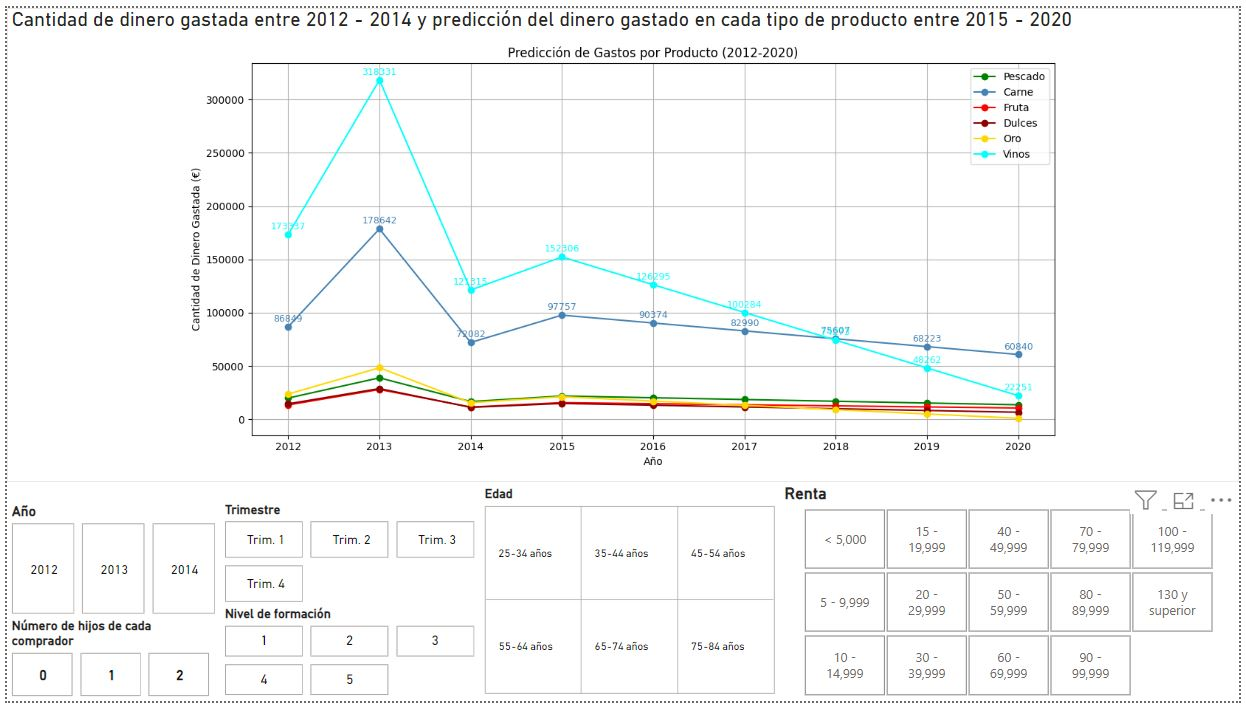

Esquema del Proceso:

1. Cargar Datos
        Leer dataset y convertir fechas a datetime.

2. Filtrar y Sumar Gastos Históricos
        Filtrar datos para los años 2012, 2013 y 2014.
        Sumar gastos por producto para estos años.

3. Conversión de Variables Categóricas a Dummy
        Convertir las columnas 'Estado civil' y 'Nivel de formación' en variables dummy.

4. Modelo de Regresión
        Definir variables predictoras.
        Entrenar modelo de regresión con datos de 2012-2014.
        Hacer predicciones para los años 2015-2020.

5. Crear DataFrame de Predicciones
        Almacenar predicciones en un DataFrame.

6. Combinar Datos
        Combinar datos históricos con predicciones en un solo DataFrame.

7. Visualización
        Crear gráfico de línea con datos históricos y predicciones.
        Utilizar colores distintos para cada producto.
        Formatear ticks del eje y con punto para miles.



Añadir el símbolo de euro: En la sección de anotaciones (plt.annotate), he modificado el formato de texto para agregar el símbolo de euro al valor, usando {txt:.0f} € para productos como 'Vinos' y 'Carne'. Para los demás productos, se conserva el formato {txt:.0f} para mostrar solo el número entero.



**Resumen del código**: Este código tiene como objetivo predecir los gastos futuros en distintos productos basándose en los datos históricos de los años 2012, 2013 y 2014. También incluye la visualización de los datos históricos junto con las predicciones para los años 2015 a 2020. Hemos añadido el proceso de conversión de variables categóricas a variables dummy en tu código para que puedan ser utilizadas en un modelo de regresión lineal. Este proceso permite que variables como "Estado civil" y "Nivel de formación" sean representadas numéricamente de manera adecuada para el análisis.

**Esquema de los Cambios Paso a Paso:**
1. Importación de Bibliotecas: Se importan las bibliotecas necesarias para el análisis de datos y la regresión lineal.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.ticker as mtick

 2.Conversión de Fechas: Se convierte la columna 'Fecha de inscripción del comprador en la empresa' a tipo datetime para facilitar el filtrado por años.

 dataset['Fecha de inscripción del comprador en la empresa'] = pd.to_datetime(dataset['Fecha de inscripción del comprador en la empresa'])


3. Definición de la Función sumar_gastos: Se define una función para sumar los gastos por producto en un año específico:

def sumar_gastos(dataset):
    total_pescado = dataset['Cantidad de dinero gastada en productos de pescado'].sum()
    total_carne = dataset['Cantidad dinero gastada en productos de carne'].sum()
    total_fruta = dataset['Cantidad de dinero gastada en fruta en los dos últimos años'].sum()
    total_dulces = dataset['Cantidad de dinero gastada en dulces'].sum()
    total_oro = dataset['Cantidad de dinero gastada en productos de oro'].sum()
    total_vinos = dataset['Cantidad de dinero gastada en vinos columna'].sum()
    return pd.Series({
        'Pescado': total_pescado,
        'Carne': total_carne,
        'Fruta': total_fruta,
        'Dulces': total_dulces,
        'Oro': total_oro,
        'Vinos': total_vinos
    })


4. Filtrado de Datos Históricos: Se filtran los datos para los años 2012, 2013 y 2014.

dataset_historico = dataset[dataset['Fecha de inscripción del comprador en la empresa'].dt.year.isin([2012, 2013, 2014])]


5. Creación de un DataFrame con Gastos Históricos: Se crea un DataFrame que contiene los totales de gastos por producto para los años 2012-2014.

gastos_historicos = pd.DataFrame({
    '2012': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2012]),
    '2013': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2013]),
    '2014': sumar_gastos(dataset_historico[dataset_historico['Fecha de inscripción del comprador en la empresa'].dt.year == 2014]),
})


6. Conversión de Variables Categóricas a Variables Dummy: Se convierten las columnas categóricas 'Estado civil' y 'Nivel de formación' en variables dummy.

dataset_dummies = pd.get_dummies(dataset_historico, columns=['Estado civil', 'Nivel de formación'], drop_first=True)


7. Selección de Variables Predictoras: Se seleccionan las variables predictoras para el modelo de regresión, incluyendo las nuevas columnas dummy.

X = dataset_dummies[['Edad de los clientes por cliente',
                     'Renta cliente columna',
                     'Número de hijos de cada comprador',
                     'Número de adolescentes de cada comprador'] +
                    [col for col in dataset_dummies.columns if col.startswith('Estado civil_') or col.startswith('Nivel de formación_')]]


8. Preparación de Datos para la Predicción: Se preparan los datos para la predicción de los próximos 6 años (2015-2020).

años_historicos = np.array([2012, 2013, 2014]).reshape(-1, 1)
años_prediccion = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape(-1, 1)
predicciones = {}

9. Modelado y Predicción: Se utiliza regresión lineal para modelar y predecir los gastos por producto.

for producto in gastos_historicos.index:
    modelo = LinearRegression()
    modelo.fit(años_historicos, gastos_historicos.loc[producto])
    predicciones[producto] = modelo.predict(años_prediccion).flatten()

predicciones_df = pd.DataFrame(predicciones, index=['2015', '2016', '2017', '2018', '2019', '2020'])


10. Visualización de Resultados: Se combinan los datos históricos con las predicciones y se crea un gráfico de línea para visualizar los resultados.

resultados_completos = pd.concat([gastos_historicos.T, predicciones_df])

plt.figure(figsize=(12, 6))

colores = {
    'Pescado': '#008000',
    'Carne': '#4682B4',
    'Fruta': '#FF0000',
    'Dulces': '#8B0000',
    'Oro': '#FFD700',
    'Vinos': '#00FFFF'
}

formatter = mtick.StrMethodFormatter('{x:,.0f}')

for producto in ['Vinos', 'Carne']:
    plt.plot(resultados_completos.index, resultados_completos[producto], marker='o', label=producto, color=colores[producto])
    plt.gca().yaxis.set_major_formatter(formatter)
    for i, txt in enumerate(resultados_completos[producto]):
        plt.annotate(f'{txt:.0f} €', (resultados_completos.index[i], resultados_completos[producto].iloc[i]),
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color=colores[producto])

plt.xlabel('Año')
plt.ylabel('Cantidad de Dinero Gastada (€)')
plt.title('Predicción de Gastos por Producto (2012-2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusión:Este esquema detalla el proceso de preprocesamiento de datos, conversión de variables categóricas a dummy, modelado y predicción, y visualización de resultados. Estos pasos aseguran que las variables categóricas se manejen adecuadamente en el modelo de regresión lineal, mejorando la precisión de las predicciones.

Añadir el símbolo de euro: En la sección de anotaciones (plt.annotate), he modificado el formato de texto para agregar el símbolo de euro al valor, usando {txt:.0f} € para productos como 'Vinos' y 'Carne'. Para los demás productos, se conserva el formato {txt:.0f} para mostrar solo el número entero.


# **11.4 Predicción de la cantidad de dinero gastada por parte de los siguientes cinco clientes**

**Valores aleatorios para 5 clientes**: Claro, puedo generar valores aleatorios para los nuevos datos basados en el rango de **valores típicos** que podrías esperar en tu conjunto de datos. Aquí tienes una forma de generar valores aleatorios para los nuevos datos:

En este código:

1. Se genera un conjunto de datos nuevos_datos con valores aleatorios para simular nuevos clientes

2. Se muestra en pantalla los datos generados aleatoriamente.

3. Se continúa con el preprocesamiento de los datos, división en conjuntos de entrenamiento y prueba, estandarización, definición y entrenamiento del modelo ElasticNet, y finalmente la predicción y visualización de resultados.

Puedes ajustar los rangos de los valores aleatorios (np.random.randint) según las características típicas de tus datos reales. Este es solo un ejemplo para ayudarte a empezar con valores aleatorios.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Los datos importados desde Power BI se almacenan en el dataframe 'dataset'
# Supongamos que tienes una variable dataset que contiene tus datos

# Generar datos aleatorios para nuevos clientes
np.random.seed(42)  # Para reproducibilidad
num_nuevos_clientes = 5

nuevos_datos = {
    'Renta cliente columna': np.random.randint(40000, 100000, num_nuevos_clientes),
    'Edad de los clientes por cliente': np.random.randint(20, 60, num_nuevos_clientes),
    'Número de hijos de cada comprador': np.random.randint(0, 3, num_nuevos_clientes),
    'Número de adolescentes de cada comprador': np.random.randint(0, 2, num_nuevos_clientes),
    'Cantidad de dinero gastada en productos de pescado': np.random.randint(10, 100, num_nuevos_clientes),
    'Cantidad dinero gastada en productos de carne': np.random.randint(100, 400, num_nuevos_clientes),
    'Cantidad de dinero gastada en fruta en los dos últimos años': np.random.randint(10, 60, num_nuevos_clientes),
    'Cantidad de dinero gastada en dulces': np.random.randint(10, 50, num_nuevos_clientes),
    'Cantidad de dinero gastada en productos de oro': np.random.randint(50, 200, num_nuevos_clientes),
    'Numero de compras hechas con descuento': np.random.randint(1, 5, num_nuevos_clientes),
    'Numero de compras en pagina web por cliente': np.random.randint(1, 10, num_nuevos_clientes),
    'Numero de compras en catalogo por cliente': np.random.randint(1, 10, num_nuevos_clientes),
    'Numero de compras en tienda fisica por cliente': np.random.randint(1, 10, num_nuevos_clientes),
    'Numero de visitas a la pagina web en el ultimo mes': np.random.randint(1, 10, num_nuevos_clientes),
    'Oferta comprada en la primera campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Oferta comprada segunda campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Oferta comprada tercera campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Oferta comprada cuarta campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Quinta campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Sexta campaña': np.random.randint(0, 2, num_nuevos_clientes),
    'Presentación de quejas': np.random.randint(0, 2, num_nuevos_clientes),
    'Respuesta': np.random.randint(0, 2, num_nuevos_clientes),
    'Nivel de formación': np.random.randint(1, 5, num_nuevos_clientes),
    'Estado civil': np.random.randint(1, 7, num_nuevos_clientes)
}

nuevos_datos = pd.DataFrame(nuevos_datos)

# Mostrar los nuevos datos generados
print("\nNuevos datos generados aleatoriamente para predicción:")
print(nuevos_datos)

# Suponiendo que el resto del código para entrenar el modelo y hacer predicciones es similar al proporcionado anteriormente

# Preprocesamiento de los datos
df = dataset.dropna()

# Dividir en variables predictoras y variable objetivo
X = df.drop(columns=['Edad de los clientes por cliente', 'Renta cliente columna', 'Número de hijos de cada comprador', 'Nivel de formación', 'Estado civil'])  # Ajusta las columnas según tu conjunto de datos. Añadir todas las variables socioeconómicas.

y = df[['Cantidad de dinero gastada en vinos columna', 'Cantidad de dinero gastada en fruta en los dos últimos años',
       'Cantidad dinero gastada en productos de carne', 'Cantidad de dinero gastada en productos de pescado',
       'Cantidad de dinero gastada en dulces', 'Cantidad de dinero gastada en productos de oro']].sum(axis=1)  # Suma total de gastos en productos

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo ElasticNet
modelo = ElasticNet(max_iter=10000)

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

# Ajustar las columnas de los nuevos datos
nuevos_datos = nuevos_datos.reindex(columns=X.columns, fill_value=0)

# Estandarizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Hacer la predicción con el modelo entrenado
predicciones = modelo.predict(nuevos_datos_scaled)
print(f"\nPredicción de dinero gastado en total en todos los productos para nuevos datos: {predicciones}")

# Crear una lista con los resultados
clientes = [f'Cliente {i+1}' for i in range(num_nuevos_clientes)]
resultados = list(zip(clientes, predicciones))

# Mostrar la lista de predicciones
resultados_df = pd.DataFrame(resultados, columns=['Cliente', 'Predicción de Gasto'])
print(resultados_df)

# Gráfico de líneas para visualizar las predicciones
plt.figure(figsize=(8, 5))
plt.plot(predicciones, marker='o', linestyle='-', color='b')
plt.xlabel('Clientes')
plt.ylabel('Predicción de Gasto Total en Productos')
plt.title('Predicciones de Gasto Total en Productos para Nuevos Clientes')
plt.xticks(range(num_nuevos_clientes), clientes)
plt.grid(True)
plt.show()

# Gráfico de barras con valores
plt.figure(figsize=(10, 6))
bars = plt.bar(clientes, predicciones, color='blue')

# Etiquetas de valores en las barras
for bar, valor in zip(bars, predicciones):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{valor:.2f}', ha='center', va='bottom')

plt.xlabel('Clientes')
plt.ylabel('Predicción de Gasto Total en Productos')
plt.title('Predicción de Gasto Total en Productos para Nuevos Datos')
plt.show()


# **11.5 Predicción de la cantidad de dinero gastada por parte de los siguientes 1000 clientes**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ejemplo de datos de entrada para los nuevos clientes
nuevos_datos = pd.DataFrame({
    'Renta cliente columna': [60000, 80000, 50000, 70000, 90000],
    'Edad de los clientes por cliente': [30, 45, 25, 35, 50],
    'Número de hijos de cada comprador': [0, 1, 1, 0, 1],
    'Número de adolescentes de cada comprador': [1, 0, 0, 1, 0],
    'Cantidad de dinero gastada en productos de pescado': [50, 30, 20, 40, 60],
    'Cantidad dinero gastada en productos de carne': [300, 200, 150, 250, 350],
    'Cantidad de dinero gastada en fruta en los dos últimos años': [50, 20, 30, 40, 10],
    'Cantidad de dinero gastada en dulces': [30, 40, 25, 35, 45],
    'Cantidad de dinero gastada en productos de oro': [100, 200, 150, 120, 180],
    'Numero de compras hechas con descuento': [3, 2, 4, 3, 2],
    'Numero de compras en pagina web por cliente': [8, 4, 6, 7, 5],
    'Numero de compras en catalogo por cliente': [10, 5, 8, 9, 7],
    'Numero de compras en tienda fisica por cliente': [6, 9, 7, 8, 5],
    'Numero de visitas a la pagina web en el ultimo mes': [7, 5, 6, 8, 4],
    'Oferta comprada en la primera campaña': [0, 1, 0, 1, 0],
    'Oferta comprada segunda campaña': [0, 0, 1, 0, 1],
    'Oferta comprada tercera campaña': [0, 1, 0, 1, 0],
    'Oferta comprada cuarta campaña': [1, 0, 1, 0, 1],
    'Quinta campaña': [0, 0, 1, 0, 1],
    'Sexta campaña': [1, 0, 1, 0, 1],
    'Presentación de quejas': [0, 0, 0, 1, 0],
    'Respuesta': [1, 0, 1, 0, 1],
    'Nivel de formación': ['Grado universitario', 'ESO', 'FP', 'Master', 'Doctorado'],
    'Estado civil': ['Soltero', 'Casado', 'Divorciado', 'Pareja de hecho', 'Viudo/a']
})

# Generar variables dummy para 'Nivel de formación' y 'Estado civil'
nuevos_datos = pd.get_dummies(nuevos_datos, columns=['Nivel de formación', 'Estado civil'], drop_first=True)

# Supongamos que 'dataset' es tu DataFrame original con datos históricos

# Preprocesamiento de los datos
dataset = dataset.dropna()
dataset = pd.get_dummies(dataset, columns=['Nivel de formación', 'Estado civil'], drop_first=True)

# Dividir en variables predictoras y variable objetivo
X = dataset.drop(columns=['Edad de los clientes por cliente'])  # Ajusta las columnas según tu conjunto de datos
y = dataset[['Cantidad de dinero gastada en vinos columna', 'Cantidad de dinero gastada en fruta en los dos últimos años',
             'Cantidad dinero gastada en productos de carne', 'Cantidad de dinero gastada en productos de pescado',
             'Cantidad de dinero gastada en dulces', 'Cantidad de dinero gastada en productos de oro']].sum(axis=1)  # Suma total de gastos en productos

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Definir el modelo ElasticNet
modelo = ElasticNet(max_iter=10000)

# Entrenar el modelo
modelo.fit(X_scaled, y)

# Hacer la predicción con el modelo entrenado
predicciones = modelo.predict(nuevos_datos_scaled)
print(f"\nPredicción de dinero gastado en total en todos los productos para nuevos datos: {predicciones}")

# Crear una lista con los resultados
clientes = [f'Cliente {i+1}' for i in range(len(predicciones))]
resultados = list(zip(clientes, predicciones))

# Mostrar la lista de predicciones
resultados_df = pd.DataFrame(resultados, columns=['Cliente', 'Predicción de Gasto'])
print(resultados_df)

# Gráfico de líneas para visualizar las predicciones
plt.figure(figsize=(8, 5))
plt.plot(predicciones, marker='o', linestyle='-', color='b')
plt.xlabel('Clientes')
plt.ylabel('Predicción de Gasto Total en Productos')
plt.title('Predicciones de Gasto Total en Productos para Nuevos Clientes')
plt.xticks(range(len(predicciones)), clientes)
plt.grid(True)
plt.show()

# Gráfico de barras con valores
plt.figure(figsize=(10, 6))
bars = plt.bar(clientes, predicciones, color='blue')

# Etiquetas de valores en las barras
for bar, valor in zip(bars, predicciones):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{valor:.2f}', ha='center', va='bottom')

plt.xlabel('Clientes')
plt.ylabel('Predicción de Gasto Total en Productos')
plt.title('Predicción de Gasto Total en Productos para Nuevos Datos')
plt.show()


ValueError: All arrays must be of the same length